<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Data_Processing_in_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table Content**


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https:">Introduction</a></li>
        <li><a href="https:">Import Library</a></li>
        <li><a href="https:">Dataset</a></li>
        <li><a href="#downloading_data">Data Loading</a></li>
        <li><a href="#downloading_data">Python Usfull Library</a></li>
        <li><a href="#pre-processing">Dropping feature</a></li>
         <li><a href="#pre-processing">Convert target variable into binary Form</a></li>
        <li><a href="#setting_up_tree">Data Imbalanced problem </a></li>
        <li><a href="#modeling">Missing Values</a></li>
         <li><a href="#modeling">Inconsistent data/Irrelevant features</a></li>
        <li><a href="#prediction">Hot Encoding</a></li>
        <li><a href="#prediction">Feature Scaling</a></li>
        <li><a href="#evaluation">Outlier Detection</a></li>
    </ol>
</div>
<br>
<hr>


# **Data Collection**

Data Collection is the first step in the project of the data science life cycle. It is one of the most important things in the life cycle. The data can be taken from various places likes the internet, company data, database, and many more…

![](https://drive.google.com/uc?export=view&id=1kCl_cjl1lzyMJ96MXBuz0EppQ9gClTM7)

# **Introduction**

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

![](https://drive.google.com/uc?export=view&id=1BmbAhW7JFubwX4r8lNIYQ700VD0VPa8h)

# **Import libaray**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# **Section 1-DataSet loading**

## **1.1- Synthetic Dataset**

I am going to show you how there are data sets that are already included in a Python package. Not only that, but I am also going to show you how to find them, what they entail, and what kind of project they would be great for.

### **Generate random dummy data**[11]

To generate random ‘dummy’ data, we can make use of the make_classification() function in case of classification data, and make_regression() function in case of regression data. This is very useful in some cases when debugging or when you want to try out certain things on a (small) random data set.

Below, we generate 10 classification data points consisting of 4 features (found in X) and a class label (found in y), where the data points belong to either the negative class (0) or the positive class (1):

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
X, y = make_classification(n_samples=10, n_features=4, n_classes=2, random_state=123)

Here, X consists of the 4 feature columns for the generated data points:

In [ ]:
pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4'])

,Feature_1,Feature_2,Feature_3,Feature_4
0,-0.525038,-0.891119,-1.713221,1.315132
1,0.350666,0.780601,1.892239,-1.453395
2,-0.128317,-0.408917,-1.189686,0.914115
3,1.422256,1.031467,-0.935643,0.724513
4,-1.043645,-1.322303,-1.594203,1.221731
5,0.794175,0.935251,0.926843,-0.709606
6,-0.773266,-0.353686,1.344147,-1.036172
7,-0.992341,-0.860456,0.084953,-0.068954
8,-0.152253,0.411750,2.206481,-1.696821
9,-1.543099,-1.470873,-0.403813,0.304769


In [ ]:
#And y contains the corresponding label of each data point:
pd.DataFrame(y, columns=['Label'])


,Label
0,0
1,1
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,0


In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10

### **Create Dataset with SMOTE**


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

### **Faker [10]**

We might come across a situation where we need to generate some test data or use some dummy data in our analysis. One way to get dummy data is by using the Faker library. This will generate fake data for you very quickly when you need to.

Faker is a fantastic package to generate fake random data. Each time you use the faker library generator, it will result in different random data. There are numerous exciting methods like fake text, fake credit card numbers. The complete documentation of this faker library and its uses is at this link [21]

**Installation**


In [ ]:
!pip install faker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.8 MB/s eta 0:00:00


**Example**

In [ ]:
from faker import Faker
fake = Faker()

In [ ]:
# Generating fake email
print (fake.email())
# Generating fake country name
print(fake.country())
# Generating fake name
print(fake.name())
# Generating fake text
print(fake.text())
# Generating fake lat and lon
print(fake.latitude(), fake.longitude())
# Generating fake url
print(fake.url())
# Generating fake profile
print(fake.profile())
# Generating random number
print(fake.random_number())

In [ ]:
from faker import Faker
fake = Faker()

print(fake.profile())
print(fake.credit_card_number())

### **Wine Dataset**

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()

for line in wine.DESCR.split("\n")[5:29]:
    print(line)

wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df["WineType"] = wine.target

wine_df.head()

### **Breast Cancer Dataset**

In [ ]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

for line in breast_cancer.DESCR.split("\n")[5:31]:
    print(line)

breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns = breast_cancer.feature_names)
breast_cancer_df["TumorType"] = breast_cancer.target

breast_cancer_df.head()

### **Boston Housing Dataset**

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

for line in boston.DESCR.split("\n")[5:29]:
    print(line)

boston_df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_df["Price"] = boston.target

boston_df.head()

### **Seaborn Datasets**[16]

In [ ]:
#Importing the modules
import pandas as pd
import seaborn as sns
#Loading the dataset
planets = sns.load_dataset('planets')
#Showing 10 first row in the planets data
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
# we need to import the seaborn package first
import seaborn as sb

# import pandas for data frame
import pandas as pd

# using seaborn, we can return a list of the data set names
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# we can load the dataset directly onto a data frame
df = sb.load_dataset('anscombe')

# look at a portion to see what we are working with
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


#### **Dataset Details**[16]

**1. Anscombe**

Anscombe’s quartet is comprised of four data sets that have nearly identical simple descriptive statistics — meaning that they all have eleven points and their averages and variance are all very similar. But they all have very different distributions and appear very different when graphed. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties. Both of these are important ideas to a good data scientist.

The trend lines show a striking contrast to their points. Pay close attention to how their observations form unique patterns but the trend lines are all similar.Suggested Projects
We can do a few things here:
- Clustering — build an algorithm that can detect patterns in the data and see if there is any similarity between points in datasets I, II, III, and IV.
- Logistic Regression — try and predict which point belongs to which data set
- Linear Regression — try and predict the missing value of x or y

**2. Attention**

This data set is built upon test takers, whether they were focused, and what score they received. The data set looks like this:

**Suggested Projects:**

Logistic Regression — we can try and predict whether the target variable is ‘focused’ or ‘distracted.’

**3. Car Crashes**

This data set is divided into different states in the U.S. Each state has the following features:
As you can see, the data set is flush with continuous variables. Ignoring the ‘abbrev’ feature which just tells us the state, we can use this data set to predict almost any feature.

**Suggested Projects:**

- Multivariate Linear Regression — using the combination of features you can try to build a model that will predict any of the features.
- Clustering — grouping states together based on the features. An interesting analysis idea would be to look at the clusters to try and determine group models using outside research (ie. traffic laws).

**4. Diamonds**

Let’s take a look at the data set below:
n this data set, each observation is a unique diamond. Features include carat, color, cut, clarity, and dimensions (x,y,z). This is a well-known beginner data set that can be used in a variety of projects.

**Suggested Projects:**

- Multivariate Linear Regression — there are a lot of continuous variables that could be predicted
- Multivariate Logistic Regression — try to predict either color, cut, or clarity using the other features
- Clustering — analyze clusters that come up and determine shared characteristics (ie. overpriced, fairly priced, etc)

**5. Flights**

This data set is the first we are going to talk about that is time-related. It looks like this:It is the monthly passenger amount from January 1949 to December 1960. With some data wrangling, you can get year and month features to combine leaving you with a nice time step.

**Suggested Projects:**

Time Series — using the data, you can set out to predict the passenger at the later end of the time frame.
Be careful, there is a cyclical nature to this data set.

**6. Iris**

The Iris data set is another fundamental data set that most of us in data science have worked with in one way or another. It contains sepal and petal dimensions for four types of iris flowers.

**Suggested Projects:**

Multivariate Logistic Regression — using the dimensions above, you can try and predict the species of flower.
Clustering — using the features, aside from species, you can try and create clusters and analyze them for patterns

**7. MPG**

The MPG data set is a data frame full of cars with features and names attached. As you can see below, there is a mixture of variables that can be used for regression style models.

**Suggested Projects:**

- Multivariate Linear Regression — trying to predict weight or displacement could be a worthwhile goal
- Multivariate Logistic Regression — the non-continuous variables include origin and model year
- Clustering — ignoring the name column, you can cluster them to determine which observations are the most similar. This would mean outside research.

**8. Planets**

The ‘planets’ data set is interesting if you are a fan of astronomy. It has a series of observations which are all exoplanets. Take a quick look at the data set itself:

As you can see there a number of features, not all of which are easy to understand. So let’s talk about the most important features for a second.
- method — this reflects how the planet was detected. Be careful, there is a large class imbalance here.
- orbital period — how long it takes to complete one cycle of rotation around its center. Note: some are so far away from a star that it is unclear where the orbit begins, thus the NaN
- mass — relative weight of the exoplanet
- distance — light-years from Earth. If you are unfamiliar, a light-year is a distance that it takes light a year to travel. Since light is the fastest thing we know, this is a large distance.

**Suggested Projects:**

- Logistic Regression — you can try and predict the method of detection using the other variables. Note: large class imbalance here
Clustering — you can do a deep dive and find patterns among the exoplanets. Use different techniques like PCA to help account for variance.
- Linear Regression — you can determine whether there is a linear relationship between any of the variables and the mass of the exoplanet.

**9. Titanic**

This data set is the most well-known and used in my honest opinion — even the subject of an ongoing Kaggle competition. In this data set, you get a manifest of the passenger vessel that sank due to the infamous iceberg on its way from Ireland to New York City.

There are many features here — whether they traveled alone, what passenger class they were in, gender, and even if they had siblings — but I will only recommend one as the target variable for tradition's sake. The survived class records whether they survived or not. It is interesting to think about the final product telling you which coefficients were most important for predicting if a person lived or died.
- Logistic Regression — looking at the ‘survived’ column, you can build a model to predict which passenger will survive and which will not.
This will be a fun project and if you can master it, submit it to the Kaggle competition.

## **1.2- Data Loading**

### **Data Loading from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Malyria_2-21-2021.csv',encoding = 'latin')

In [ ]:
Train_data

,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,1,K04HEM20123774,K0460000001363,Saqib Mehmood Khan,MUHAMMAD AFSAR KHAN,NaN,1.310163e+12,NaN,34 Year(s),Male,0,Abbottabad,havelia,11/12/2020 10:46:53 A11P11,1000000000085007,Y,1000000000087207,K04HEM20123774,Negative
1,2,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310134e+12,NaN,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:21 A9P9,1000000000087207,Y,1000000000087207,K04HEM18160758,Negative
2,3,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310134e+12,NaN,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:07 A9P9,1000000000085007,Y,1000000000087207,K04HEM18160758,Negative
3,4,K04HEM17056995,K0460000000106,Shahbaz Ahmad,MUMTAZ AHMAD,NaN,4.220136e+12,NaN,28 Year(s),Male,0,Abbottabad,Abbottabad,5/4/2017 9:48:37 A5P5,1000000000085007,Y,1000000000087207,K04HEM17056995,Negative
4,5,K04HEM17073233,K0460000000150,Mehfooz Ahmad,HAIDER ZAMAN,NaN,1.310109e+12,NaN,42 Year(s),Male,0,Abbottabad,Abbottabad,6/3/2017 11:59:38 A6P6,1000000000085007,Y,1000000000087207,K04HEM17073233,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,22912,K04HEM21017730,K0400002457330,Rooh Ul Ameen,ABDUL SALAM,NaN,8.139494e+10,NaN,13 Year(s),Male,1,Haripur,Haripur,2/10/2021 16:53:12 A2P2,1000000000085060,Y,1000000000087207,K04HEM21017730,Negative
22912,22913,K04HEM21018207,K0400002459565,Zeshan Rustam,M RUSTAM,NaN,NaN,NaN,20 Year(s),Male,0,Abbottabad,Abbottabad,2/11/2021 11:49:58 A2P2,1000000000085007,Y,1000000000087207,K04HEM21018207,Negative
22913,22914,K04HEM21019179,K0400002461645,M Umer,M JUNAID,NaN,NaN,NaN,21 Year(s),Male,0,Abbottabad,Abbottabad,2/13/2021 11:55:21 A2P2,1000000000087207,Y,1000000000087207,K04HEM21019179,Negative
22914,22915,K04HEM21021055,K04ACE21027742,Shaheen Akhtar,NaN,M SALEEM,NaN,NaN,45 Year(s),Female,0,Abbottabad,Abbottabad,2/17/2021 11:09:47 A2P2,1000000000087207,Y,1000000000087207,K04HEM21021055,Negative


### **Data loading From Github**

In [ ]:
!rm markets.csv
!wget https://raw.githubusercontent.com/shadgriffin/ml_bias/main/markets.csv

df = pd.read_csv("markets.csv", sep=",", header=0)

# **3- Python Usufull library**[10]

## **Numerizer**

Amazing library to convert text numerics into int and float. Useful library for NLP projects. For more details, please check PyPI and this github repo.

In [ ]:
!pip install numerizer


**Example**

In [ ]:
#importing numerize library
from numerizer import numerize
from numerizer import numerize
#examples
a = int(numerize('Three'))
print(a)
print(numerize('five thousand two hundred and twenty'))


## **EMOT [10]**

Collecting and analyzing data on emojis as well as emoticons give useful insights, especially in sentiment analysis. An emoji is an image small enough to insert into text that expresses an emotion or idea. An emoticon is a representation of a human facial expression using only keyboard characters such as letters, numbers, and punctuation marks.
emot helped us to convert the emojis and emoticons into words. For more details on this library, please check this Github repo. It has a good collection of emoticons and emojis with the corresponding words.

In [ ]:
!pip install emot


In [ ]:
#Importing libraries
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
# Function for converting emojis into word
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    return text
# Example
text1 = "Hilarious 😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒"
convert_emojis(text1)

In [ ]:
# Function for converting emoticons into word
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text# Example
text = "Hello :-) :-)"
convert_emoticons(text)

## **Pretty-Table**

The prettytable library is used to represent data in a relational table. With prettytable other operations on the tabular data can be performed like adding or deleting a row, alignment of columns, and clearing all the data in the table [21]

In [ ]:
python -m pip install -U prettytable

In [ ]:
from prettytable import PrettyTable
table = PrettyTable()

table.field_names = ["Month","Earning"]
table.add_rows(
    [
        ["JANUARY",1020],
        ["FEBRUARY", 1233],
        ["MARCH", 1892],
        ["APRIL", 1500]
    ]
)
print(table)

## **Barcode**

Accessible and yet powerful library in Python to create the barcode. We are using this library, a barcode in .png format. In the program, we have used European Article Number(EAN) 13 number barcode image. You can try to use different methods present in the barcode library [21]

In [ ]:
!pip install python-barcode

     |████████████████████████████████| 217 kB 10.2 MB/s 


In [ ]:
from barcode import EAN13
from barcode.writer import ImageWriter

number='123456789123'
mycode=EAN13(number, writer=ImageWriter())
mycode.save('new')

'new.png'

## **Num2Words**

With the num2words library, we can change any given number value into words. This library is helpful while building invoice apps where you require to change the entered number into words [21]

In [ ]:
!pip install num2words

In [ ]:
from num2words import num2words

num = input("Enter the number ")
print(num2words(num))

# **4- Dropping feature**

Dropping feature usually isn’t recommended because you’re losing information. But if you’re sure that the column isn’t important, or simply has too many missing values, you can choose to drop them. For example, for this dataset, the host_name column was removed for ethical reasons, and id was removed because it was was unnecessary.
To drop features, use drop and set axis to 1 and inplace to true. Axis is 1 because we want to drop columns (0 means row), and inplace is True because you're transforming it directly on your dataset.

## **3.1 Drop Index Columns**

In [ ]:
Train_data=Train_data.reset_index()
Train_data=Train_data.drop(columns=['index'])

## **3.2 Drop Multiple featurs**

In [ ]:
New5=Train_data.drop(Train_data.columns[[0,1,3,4,5,6,7,10,17]], axis=1, inplace=True)

In [ ]:
# Drop unnecessary columns that are not important
colsToDrop = ['id','host_name','last_review']

airbnb.drop(colsToDrop, axis=1, inplace=True)

missing_cols(airbnb)

## **3.3-Dropping the row**

If you want to remove rows, you do so using dropna . I’m not going to do that because there are no missing values in price.

In [ ]:
# remove rows with missing values in price
airbnb['price'].dropna(inplace=True)

# **5- Convert target variable into binary Form**

In [ ]:
Train_data['RESULT_TEXT'].replace({'Negative': 0, 'Positive': 1},inplace = True)

# **6-Data Imbalanced problem** [8]


An imbalance occurs when one or more classes have very low proportions/probability in the training data as compared to the other classes. Our model gives us poor predictive performance, specifically for the minority class if we don't handle the imbalanced data.

Imagine you are trying to build a classification model, and you have two classes: Cats and Dogs. Unfortunately, your data is very **skewed**: there are 950 cat pictures and 50 dog pictures.[17]

If your model classifies every picture as a Cat (dumb, right?), you’ll be 95% accurate! Think about that for a second. The **distribution** in your dataset becomes a big problem really quickly [17]

For classification tasks, one may encounter situations where the target class label is un-equally distributed. Such conditions are termed imbalanced data. Due to the presence of class imbalance the model might become biased towards the majority class data sample. A data scientist might face some challenges while modeling an imbalanced class dataset.
There are various hacks or techniques to handle an imbalanced class data sample prior to modeling including[19]


Classification is one of the most common machine learning problems. One of the common issues found in datasets that are used for classification is imbalanced classes issue. Generally, we expect the labels to be relatively even distributed. In reality, the samples we can get maybe unsatisfactory.

Take a binary classification problem for example, we might encounter too few positive samples in the training dataset, called minority class. And most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important. Such an imbalanced dataset can be addressed by sampling techniques. There are mainly three types of sampling techniques: **Oversampling**, **Undersampling** and **Synthetic Sampling**.

**Which ML algoritherm is sutiable for imbalanced Problem**[17]

As a somewhat related note, make sure you are using the right algorithm to solve your problem. For example, Decision Tree-based models are excellent at handling imbalanced classes. When dealing with structured data, that might be all you need.

**Performance metrics** [17]

Accuracy is not the best performance metric on these problems
Accuracy is not a good performance metric when you have an imbalanced dataset.
Instead, and depending on your specific problem, you should look at any of the following:

- Precision, Recall, F-Score
- Confusion Matrix
- ROC Curves

**Why Imbalanced dataset is bad?**

So why does imbalance lead to poor model performance? Because any algorithm cannot obtain enough information from a class with a small sample size to make accurate predictions. The uneven distribution of the corresponding variables reduces the accuracy of the algorithm, and the prediction accuracy for small classes will be very low. The algorithm itself is error-driven, that is, the goal of the model is to minimize the overall error, and the contribution of small classes to the overall error is very low. The algorithms themselves assume that the class distribution of the data set is balanced, and they may also assume that different classes of errors bring the same loss.


## **Check Imbalanced Problem in Data**

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Train_data.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Results Status Negative(0) and Positive(1) in the Imbalanced Dataset')
plt.show()

## **6.1-Handle Imbalanced dataset problem**

- 1) Oversampling Minority Class
- 2) Downsampling Majority Class
- 3) Generate Synthetic Data
- 4) Balanced Class Weight
- 5) Combine Oversampling & Downsampling Techniques

### **6.1.1- Oversampling**

This method mainly deals with small classes. Use repeated observations to balance the data. There will not be any information loss using this method, but the addition of small-type repeated samples will easily lead to over-fitting, and the calculation time and storage overhead will also increase.

Upsampling or Oversampling refers to create artificial minority class data points to balance the distribution between the majority and minority class sample. Whereas, downsampling or undersampling refers to the removal of majority class data points to balance the target class distribution.[19]

There are various oversampling techniques such as Random Oversampler, SMOTE, ADASYN, etc, that can be used to generate artificial or duplicate minority class data points. Similarly, various undersampling techniques include Random Undersampler, TomekLinks, ENN, NearMiss, etc, that removes the minority class sample.[19]

Over Sampling is used to increase the minority class by randomly duplicating them [23]

**Idea:**

The idea is to combine the oversampling and undersampling techniques to handle the imbalance in the dataset and further train a robust machine learning model.

![](https://drive.google.com/uc?export=view&id=1Zze6DH82-UqfgfYK8J4gerDY18LbH7rO)

#### **Naive RandomOverSampler**

mporting library RandomOverSampler for Over Sampling and then fitting independent features X and dependent feature y.[23]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_os, y_os = ros.fit_resample(X,y)


[8]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))
[(0, 4674), (1, 4674), (2, 4674)]

The main disadvantage of over sampling is, it will cause overfitting the machine learning model as we are duplicating the records of minority classes randomly [23]

#### **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_trai

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Train_data.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Results Status Negative(0) and Positive(1) in the Imbalanced Dataset')
plt.show()

**SMOTEENN:**

In [ ]:
smt = SMOTEENN(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)

In [ ]:
#SMOTENC [8]
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
[(0, 30), (1, 30)]
print(X_resampled[-5:])
[['A' 0.5246469549655818 2]
 ['B' -0.3657680728116921 2]
 ['B' 0.9344237230779993 2]
 ['B' 0.3710891618824609 2]
 ['B' 0.3327240726719727 2]]

**SMOTETomek:**

In [ ]:
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)

**Borderline-SMOTE**

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
X_train_Before= X_train
y_train_Before= y_train
borderlineSMOTE = BorderlineSMOTE(k_neighbors = 10, random_state = 42)
X_train, y_train = borderlineSMOTE.fit_resample(X_train_Before,y_train_Before)

[8] ADASYN

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
[(0, 4674), (1, 4674), (2, 4674)]
clf_smote = LinearSVC().fit(X_resampled, y_resampled)
X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
[(0, 4673), (1, 4662), (2, 4674)]
clf_adasyn = LinearSVC().fit(X_resampled, y_resampled)

### **6.1.2-Undersampling**

This method is mainly to deal with large categories. Use to reduce the number of observations in large categories to balance the data set. It is suitable when the overall data set is large, and this method can also reduce the calculation time and storage overhead (the training set samples are less). It is also possible to combine the two methods of oversampling and undersampling. The large class uses undersampling without replacement, and the small class uses oversampling with replacement.

Under Sampling is used to decrease the majority class by randomly eliminating the majority class. This is done until majority and minority class instances are balanced out [23]

#### **NearMiss**

Importing library NearMiss for Under Sampling and then fitting independent features X and dependent feature y.[23]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_us, y_us = nm.fit_resample(X,y)

The main disadvantage of under-sampling is, We lose the information of data. We can use under-sampling when we have millions of records [23]

![](
https://drive.google.com/uc?export=view&id=10OLxqUKqVGd_Uknw-Griz4Ultd9sjMYM)

### **6.1.3- Combine both techniques**

#### **Edited Nearest Neighbour (ENN)**

In [ ]:
smt = SMOTEENN(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train

####**SMOTETomek**

In [ ]:
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)

**Synthetic Sampling**


The synthetic data sampling method uses artificial data instead of repeating the original observations to solve the imbalance. Among those algorithms, ASMOTE (Synthetic Minority Oversampling Technique) is the most common a data sampling technique.
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.
Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.
This procedure can be used to create as many synthetic examples for the minority class as are required. As described in the paper, it suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.
The approach is effective because new synthetic examples from the minority class are created that are plausible, that is, are relatively close in feature space to existing examples from the minority class.
A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

![](https://drive.google.com/uc?export=view&id=1TwyAC1SK2t7fXcdsin6aNGNq0pT48kke)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Train_data.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Results Status Negative(0) and Positive(1) in the Imbalanced Dataset')
plt.show()

## **Data resample**

In [ ]:
from sklearn.utils import resample
no = Train_data[Train_data.RESULT_TEXT == 0]
yes = Train_data[Train_data.RESULT_TEXT == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])
fig = plt.figure(figsize = (8,5))
oversampled.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Waterbrone Disease status Nagative(0) and Postive(1) after Oversampling (Balanced Dataset)')
plt.show()

## **SMOTE** [3,4]

**SMOTEENN:[19]**

We can perform oversampling of the minority class using SMOTE technique and further perform undersample using Edited Nearest Neighbour (ENN). The advantage of performing the undersampling technique — ENN after oversampling is that it cleans or removes the noise majority class data points.
Imblearn library comes with the implementation of SMOTEENN.[19]

In [ ]:
smt = SMOTEENN(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)

**SMOTETomek:** [19]

Similarly, we can perform oversampling of the minority class using SMOTE technique and further undersample or perform cleaning using the Tomek Links technique.
Imblearn library comes with the implementation of SMOTETomek.

SMOTETomek is the combination of both over sampling and under sampling using SMOTE and Tomek links [23]

In [ ]:
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)

In [ ]:
from imblearn.combine import SMOTETomek
smotetomek = SMOTETomek()
X_smotetomek, y_smotetomek = smotetomek.fit_resample(X,y)

#**Section 2-  Handling missing data**

Missing values is one of the most common problems you saw when you are doing feature engineering/data preparation. The main reason for the missing values because of humans errors and data privacy and so on…

Data cleaning is the technique of eliminating garbage, incorrect, duplicate, corrupted, or incomplete data in a dataset as the part of the data preparation process with a motive to build reliable, uniform and standardized data sets. Python pandas is an excellent library for manipulating data and analyzing it.[20]

There are four ways you can perform data cleaning :
- Drop the missing values
- Replace the missing values
- Replace each NaN with a scalar value,
- Fill the missing values forward or backward.

## **2.1- How to Check Missing Values**

In [ ]:
np.sum(Train_data.isnull().any(axis=1))

238

### **How to find the exact location of null values**

In [ ]:
Train_data[Train_data.isna().any(axis=1)]

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
59,K0400000124388,10 Year(s),Female,Batgram,Alai,NaN,1000000000085045,N,1000000000087207,Negative
110,K0400000228342,29 Year(s),Male,Abbottabad,Abbottabad,NaN,1000000000087207,Y,1000000000087207,Negative
211,K0400000375499,32 Year(s),Male,Mansehra,Oghi,NaN,1000000000085060,N,1000000000087207,Positive
240,K0400000412427,7 Year(s),Female,Abbottabad,Abbottabad,NaN,1000000000085651,N,1000000000087207,Negative
319,K0400000485472,53 Year(s),Male,Mansehra,Mansehra,NaN,1000000000087207,Y,1000000000087207,Negative
...,...,...,...,...,...,...,...,...,...,...
22802,K0400002361945,15 Year(s),Male,Batgram,Batagram,NaN,1000000000087207,N,1000000000087207,Negative
22807,K04ACE20160252,20 Year(s),Male,Abbottabad,Abbottabad,NaN,1000000000085007,N,1000000000087207,Negative
22841,K04ACE20177210,23 Year(s),Female,Abbottabad,Abbottabad,NaN,1000000000085007,N,1000000000087207,Negative
22888,K04ACE20223641,50 Year(s),Male,Abbottabad,Abbottabad,NaN,1000000000085007,N,1000000000087207,Negative


[20]

### **How to check for percentages of null values in each column**

In [ ]:
# [20]
Train_data.notnull().mean()

MRNO               1.000000
AGE                1.000000
GENDER             1.000000
DISTRICT           1.000000
TEHSIL             1.000000
REPORT_VERIFIED    0.989614
CPT_ID             1.000000
RESULT_VALUE       1.000000
CPT_ID.1           1.000000
RESULT_TEXT        1.000000
dtype: float64

In [ ]:
total = Train_data.isnull().sum().sort_values(ascending=False)
percent = (Train_data.isnull().sum()/Train_data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
REPORT_VERIFIED,238,0.010386
MRNO,0,0.000000
AGE,0,0.000000
GENDER,0,0.000000


from matplotlib import pyplot as plt
_df_0['Total'].plot(kind='hist', bins=20, title='Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Percent'].plot(kind='hist', bins=20, title='Percent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Total', y='Percent', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Total'].plot(kind='line', figsize=(8, 4), title='Total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Percent'].plot(kind='line', figsize=(8, 4), title='Percent')
plt.gca().spines[['top', 'right']].set_visible(False)

**If you want to see missing values for all columns, use this command:**

In [ ]:
Train_data.isnull().sum()

MRNO                 0
AGE                  0
GENDER               0
DISTRICT             0
TEHSIL               0
REPORT_VERIFIED    238
CPT_ID               0
RESULT_VALUE         0
CPT_ID.1             0
RESULT_TEXT          0
dtype: int64

## **2.2-Visualization of Missing Values**

### **Missingo**[10]
It is widespread to find missing values in a real-world dataset. We need to understand the missing values before imputing. Missingo offers a quick and helpful way to visualize the missing values.

**Installation**


In [ ]:
!pip install missingno


**Usage**


In [ ]:
# importing necessary libraries
import pandas as pd
import missingno as mi
# reading the dummy dataset
#data = pd.read_excel(“dummy.xlsx”)
# checking missing values
Train_data.isnull().sum()

MRNO                 0
AGE                  0
GENDER               0
DISTRICT             0
TEHSIL               0
REPORT_VERIFIED    238
CPT_ID               0
RESULT_VALUE         0
CPT_ID.1             0
RESULT_TEXT          0
dtype: int64

Dummy dataset has 11 rows and four columns. Missing values presented in Min, Temp, and city variables. We can visualize using a bar graph and matrix. It also supports heatmap, dendrogram. For more details, please check this Github repository.

Visualizing missing value using bar graph
Visualizing missing value using matrix


<Axes: >

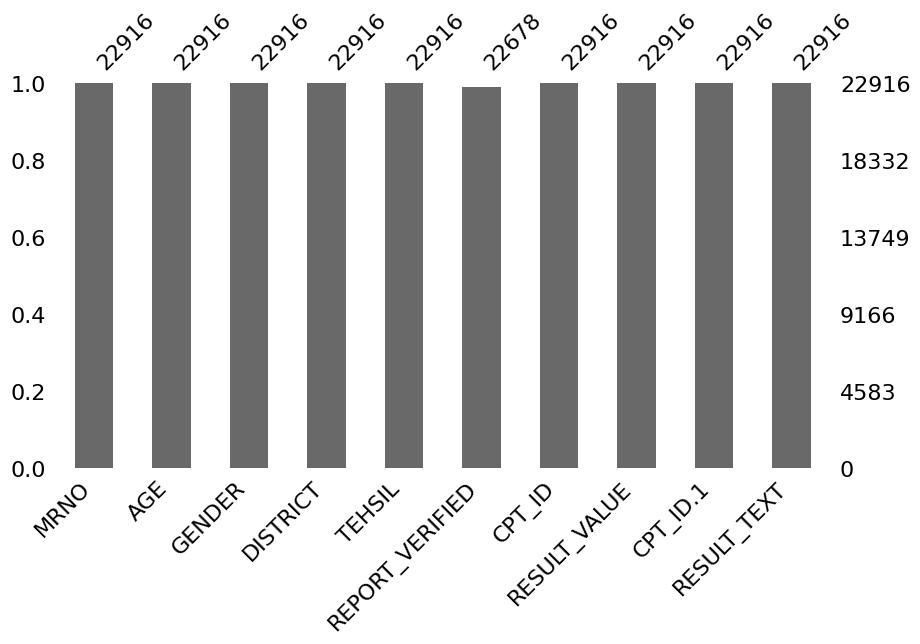

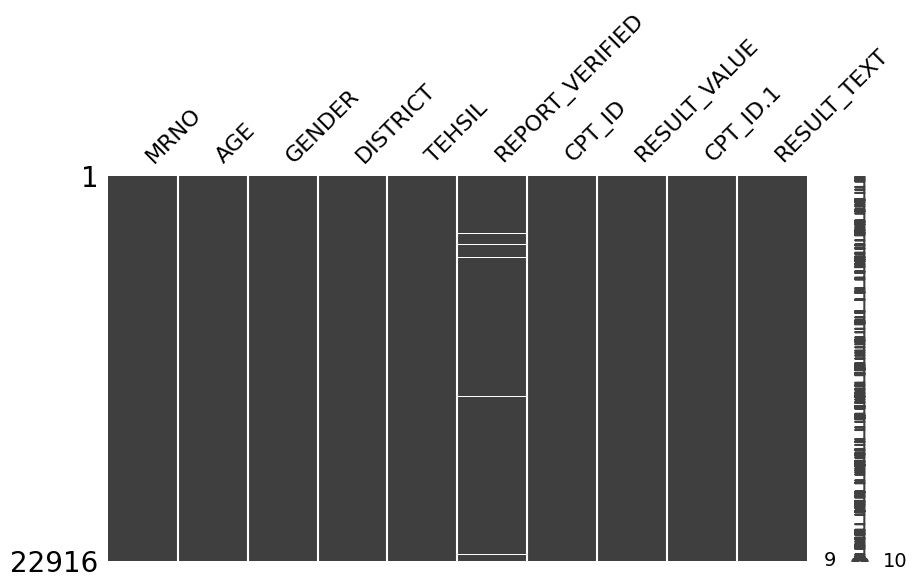

In [ ]:
#Visualizing using missingo
print('Visualizing missing value using bar graph')
mi.bar(Train_data, figsize = (10,5))
print('Visualizing missing value using matrix')
mi.matrix(Train_data, figsize = (10,5) )

**Heatmap of missing values**

Heatmaps are also useful to visualize your missing values, in particular at which point of the data do missing values exists.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

<Axes: >

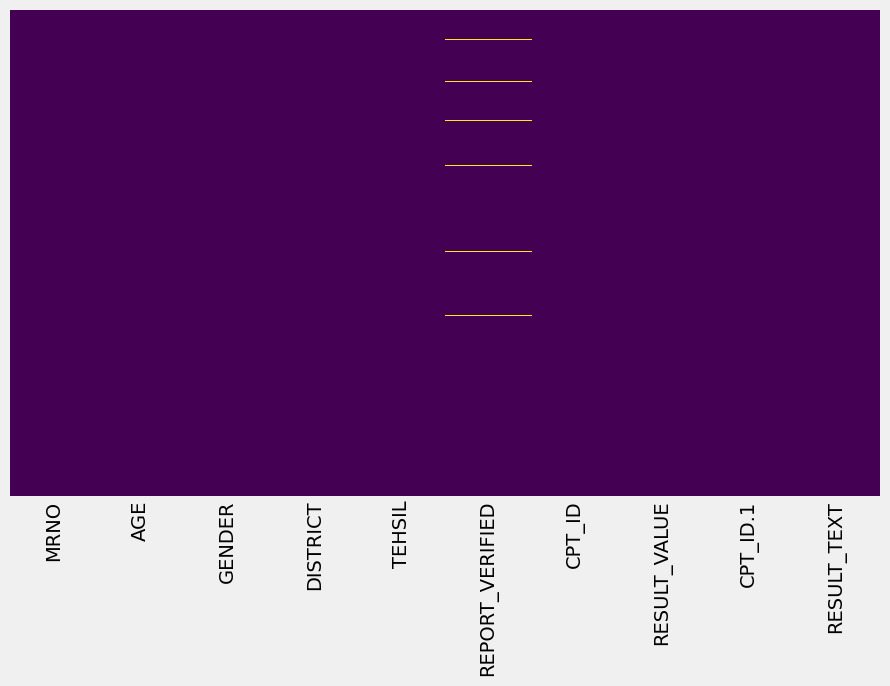

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(Train_data.isnull(), yticklabels=False, cmap='viridis', cbar=False)

## **2.3-Fill Missing Values in a Dataset**

The scikit-learn library in Python offers the **SimpleImputer()** class which can be used for filling the missing values based on:

- Mean of the known values
- Median of the known values
- Most frequent value among the known values

So let’s go through all these methods one by one for filling the missing values of a dataset. I will first create a very simple dataset with some missing values:


In [ ]:
import numpy as np
data = np.array([[10, np.nan, 8],
                 [9, 8, np.nan],
                 [7, 10, 9]])

In [ ]:
print(data)


[[10. nan  8.]
 [ 9.  8. nan]
 [ 7. 10.  9.]]


### **Data imputation**

**Filling Values with mean and Median**

Here is how you can use the Mean of the other known values for filling the missing values:



In [ ]:
# Filling Values with mean
from sklearn.impute import SimpleImputer
mean_values = SimpleImputer(strategy='mean')
data1 = mean_values.fit_transform(data)

In [ ]:
print(data1)


[[10.   9.   8. ]
 [ 9.   8.   8.5]
 [ 7.  10.   9. ]]


Here is how you can use the Median of the other known values for filling the missing values:



In [ ]:
# Filling Values with median
from sklearn.impute import SimpleImputer
median_values = SimpleImputer(strategy='median')
data2 = median_values.fit_transform(data)
print(data2)

[[10.   9.   8. ]
 [ 9.   8.   8.5]
 [ 7.  10.   9. ]]


**Filling Values with most Frequent Value**

Here is how you can use the most frequent value among the other known values for filling the missing values:

In [ ]:
# Filling values with most frequent values
from sklearn.impute import SimpleImputer
most_frequent = SimpleImputer(strategy='most_frequent')
data3 = most_frequent.fit_transform(data)
print(data3)

[[10.  8.  8.]
 [ 9.  8.  8.]
 [ 7. 10.  9.]]


**Mean/mode/median imputation**

We can also do mean/median/mode imputation. For numerical data, we can compute it’s mean or median and use the result to replace missing values and for categorical (non-numerical) data, we can compute its mode to replace the missing value [24]

For imputing, there are 3 main techniques shown below.

- fillna — filling in null values based on given value (mean, median, mode, or specified value)
- bfill / ffill — stands for backward fill and forward fill (filling in missing values based on the value after or before the column.)
- Simple Imputer — Sk-learn’s built-in function that imputes missing values (commonly used alongside a pipeline when building ML models)

Below you can find examples of applying these methods to the price column if it had missing values.

In [ ]:
import pandas as pd
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Malyria_2-21-2021.csv',encoding = 'latin')

In [ ]:
Train_data['RESULT_TEXT'].replace({'Negative': 0, 'Positive': 1},inplace = True)

In [ ]:
# imputing price with mean
# imputing price with mean
RESULT_TEXT_mean_value = round(Train_data['RESULT_TEXT'].mean(), 2)
Train_data['RESULT_TEXT'].fillna(RESULT_TEXT_mean_value, inplace=True)

# imputing price with median
price_median_value = round(Train_data['RESULT_TEXT'].median(), 2)
Train_data['RESULT_TEXT'].fillna(price_median_value, inplace=True)

# imputing with bfill or ffill
Train_data['RESULT_TEXT'].bfill(inplace=True)
Train_data['RESULT_TEXT'].ffill(inplace=True)

# imputing with SimpleImputor from the sklearn library
from sklearn.impute import SimpleImputer
# define the imputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean') # or median

Train_data[['RESULT_TEXT']] = imr.fit_transform(Train_data[['RESULT_TEXT']])

### **Replace each NaN with scalar value**

**Replace each NaN with a scalar value,**

To replace values, the fillna function is also used.Replace each NaN we have in the dataset, we can use the replace() method [24]

You define the value you want to replace in the key, and the substitute in the value — {column_name: replacement_for_NA}

Here are examples for replacing values in the columns reviews_per_month and name


In [ ]:
# replace null values in reviews_per_month with 0
Train_data.fillna({'RESULT_TEXT':0}, inplace=True)

missing_cols(Train_data)

NameError: ignored

In [ ]:
# replace null values in name with 'None'
airbnb.fillna({'name':'None'}, inplace=True)

missing_cols(airbnb)

In [ ]:
from numpy import NaN
Train_data.replace({NaN:1.00})

,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,1,K04HEM20123774,K0460000001363,Saqib Mehmood Khan,MUHAMMAD AFSAR KHAN,1.0,1.310163e+12,1.0,34 Year(s),Male,0,Abbottabad,havelia,11/12/2020 10:46:53 A11P11,1000000000085007,Y,1000000000087207,K04HEM20123774,0.0
1,2,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,1.0,1.310134e+12,1.0,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:21 A9P9,1000000000087207,Y,1000000000087207,K04HEM18160758,0.0
2,3,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,1.0,1.310134e+12,1.0,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:07 A9P9,1000000000085007,Y,1000000000087207,K04HEM18160758,0.0
3,4,K04HEM17056995,K0460000000106,Shahbaz Ahmad,MUMTAZ AHMAD,1.0,4.220136e+12,1.0,28 Year(s),Male,0,Abbottabad,Abbottabad,5/4/2017 9:48:37 A5P5,1000000000085007,Y,1000000000087207,K04HEM17056995,0.0
4,5,K04HEM17073233,K0460000000150,Mehfooz Ahmad,HAIDER ZAMAN,1.0,1.310109e+12,1.0,42 Year(s),Male,0,Abbottabad,Abbottabad,6/3/2017 11:59:38 A6P6,1000000000085007,Y,1000000000087207,K04HEM17073233,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,22912,K04HEM21017730,K0400002457330,Rooh Ul Ameen,ABDUL SALAM,1.0,8.139494e+10,1.0,13 Year(s),Male,1,Haripur,Haripur,2/10/2021 16:53:12 A2P2,1000000000085060,Y,1000000000087207,K04HEM21017730,0.0
22912,22913,K04HEM21018207,K0400002459565,Zeshan Rustam,M RUSTAM,1.0,1.000000e+00,1.0,20 Year(s),Male,0,Abbottabad,Abbottabad,2/11/2021 11:49:58 A2P2,1000000000085007,Y,1000000000087207,K04HEM21018207,0.0
22913,22914,K04HEM21019179,K0400002461645,M Umer,M JUNAID,1.0,1.000000e+00,1.0,21 Year(s),Male,0,Abbottabad,Abbottabad,2/13/2021 11:55:21 A2P2,1000000000087207,Y,1000000000087207,K04HEM21019179,0.0
22914,22915,K04HEM21021055,K04ACE21027742,Shaheen Akhtar,1.0,M SALEEM,1.000000e+00,1.0,45 Year(s),Female,0,Abbottabad,Abbottabad,2/17/2021 11:09:47 A2P2,1000000000087207,Y,1000000000087207,K04HEM21021055,0.0


In order to replace with a Scalar Value, use fillna() method

In [ ]:
Train_data.fillna(12)

,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,1,K04HEM20123774,K0460000001363,Saqib Mehmood Khan,MUHAMMAD AFSAR KHAN,12,1.310163e+12,12,34 Year(s),Male,0,Abbottabad,havelia,11/12/2020 10:46:53 A11P11,1000000000085007,Y,1000000000087207,K04HEM20123774,0.0
1,2,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,12,1.310134e+12,12,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:21 A9P9,1000000000087207,Y,1000000000087207,K04HEM18160758,0.0
2,3,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,12,1.310134e+12,12,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:07 A9P9,1000000000085007,Y,1000000000087207,K04HEM18160758,0.0
3,4,K04HEM17056995,K0460000000106,Shahbaz Ahmad,MUMTAZ AHMAD,12,4.220136e+12,12,28 Year(s),Male,0,Abbottabad,Abbottabad,5/4/2017 9:48:37 A5P5,1000000000085007,Y,1000000000087207,K04HEM17056995,0.0
4,5,K04HEM17073233,K0460000000150,Mehfooz Ahmad,HAIDER ZAMAN,12,1.310109e+12,12,42 Year(s),Male,0,Abbottabad,Abbottabad,6/3/2017 11:59:38 A6P6,1000000000085007,Y,1000000000087207,K04HEM17073233,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,22912,K04HEM21017730,K0400002457330,Rooh Ul Ameen,ABDUL SALAM,12,8.139494e+10,12,13 Year(s),Male,1,Haripur,Haripur,2/10/2021 16:53:12 A2P2,1000000000085060,Y,1000000000087207,K04HEM21017730,0.0
22912,22913,K04HEM21018207,K0400002459565,Zeshan Rustam,M RUSTAM,12,1.200000e+01,12,20 Year(s),Male,0,Abbottabad,Abbottabad,2/11/2021 11:49:58 A2P2,1000000000085007,Y,1000000000087207,K04HEM21018207,0.0
22913,22914,K04HEM21019179,K0400002461645,M Umer,M JUNAID,12,1.200000e+01,12,21 Year(s),Male,0,Abbottabad,Abbottabad,2/13/2021 11:55:21 A2P2,1000000000087207,Y,1000000000087207,K04HEM21019179,0.0
22914,22915,K04HEM21021055,K04ACE21027742,Shaheen Akhtar,12,M SALEEM,1.200000e+01,12,45 Year(s),Female,0,Abbottabad,Abbottabad,2/17/2021 11:09:47 A2P2,1000000000087207,Y,1000000000087207,K04HEM21021055,0.0


### **Drop the missine value colum**

**Drop the missing values**[24]

In [ ]:
Train_data.dropna()

,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT


Default axis=0 will excludes an entire row for an NaN value.

### **Fill missing value forward or Backward**

**Fill the missing values forward or backward.**


To fill forward or backward, use the methods pad or fill, and to fill backward, use bfill and backfill [24]

In [ ]:
Train_data.fillna(method='backfill')

,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,1,K04HEM20123774,K0460000001363,Saqib Mehmood Khan,MUHAMMAD AFSAR KHAN,YASIR,1.310163e+12,Others,34 Year(s),Male,0,Abbottabad,havelia,11/12/2020 10:46:53 A11P11,1000000000085007,Y,1000000000087207,K04HEM20123774,Negative
1,2,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,YASIR,1.310134e+12,Others,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:21 A9P9,1000000000087207,Y,1000000000087207,K04HEM18160758,Negative
2,3,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,YASIR,1.310134e+12,Others,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:07 A9P9,1000000000085007,Y,1000000000087207,K04HEM18160758,Negative
3,4,K04HEM17056995,K0460000000106,Shahbaz Ahmad,MUMTAZ AHMAD,YASIR,4.220136e+12,Others,28 Year(s),Male,0,Abbottabad,Abbottabad,5/4/2017 9:48:37 A5P5,1000000000085007,Y,1000000000087207,K04HEM17056995,Negative
4,5,K04HEM17073233,K0460000000150,Mehfooz Ahmad,HAIDER ZAMAN,YASIR,1.310109e+12,Others,42 Year(s),Male,0,Abbottabad,Abbottabad,6/3/2017 11:59:38 A6P6,1000000000085007,Y,1000000000087207,K04HEM17073233,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,22912,K04HEM21017730,K0400002457330,Rooh Ul Ameen,ABDUL SALAM,M SALEEM,8.139494e+10,NaN,13 Year(s),Male,1,Haripur,Haripur,2/10/2021 16:53:12 A2P2,1000000000085060,Y,1000000000087207,K04HEM21017730,Negative
22912,22913,K04HEM21018207,K0400002459565,Zeshan Rustam,M RUSTAM,M SALEEM,NaN,NaN,20 Year(s),Male,0,Abbottabad,Abbottabad,2/11/2021 11:49:58 A2P2,1000000000085007,Y,1000000000087207,K04HEM21018207,Negative
22913,22914,K04HEM21019179,K0400002461645,M Umer,M JUNAID,M SALEEM,NaN,NaN,21 Year(s),Male,0,Abbottabad,Abbottabad,2/13/2021 11:55:21 A2P2,1000000000087207,Y,1000000000087207,K04HEM21019179,Negative
22914,22915,K04HEM21021055,K04ACE21027742,Shaheen Akhtar,M FAYAZ,M SALEEM,NaN,NaN,45 Year(s),Female,0,Abbottabad,Abbottabad,2/17/2021 11:09:47 A2P2,1000000000087207,Y,1000000000087207,K04HEM21021055,Negative


### **Filling missing value with KNNImputer[11]**

Scikit-learn offers multiple ways to impute missing values. Here, we consider two approaches. The SimpleImputer class provides basic strategies for imputing missing values (through the mean or median for example). A more sophisticated approach the KNNImputer class, which provides imputation for filling in missing values using the K-Nearest Neighbors approach. Each missing value is imputed using values from the n_neighbors nearest neighbors that have a value for the particular feature. The values of the neighbors are averaged uniformly or weighted by distance to each neighbor.
Below, we show an example application using both imputation methods:

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.datasets import make_classification
import pandas as pd
X, y = make_classification(n_samples=5, n_features=4, n_classes=2, random_state=123)
X = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4'])
print(X.iloc[1,2])

2.2129830531512615


Transform X[1, 2] to a missing value:


In [ ]:
X.iloc[1, 2] = float('NaN')


In [ ]:
X

,Feature_1,Feature_2,Feature_3,Feature_4
0,0.070111,-0.727615,1.904188,-1.966186
1,0.410745,0.155161,NaN,-2.791157
2,-0.337408,-1.069994,0.090022,0.430782
3,-0.334743,-0.528369,-0.989942,1.480690
4,0.336622,1.802785,-1.578173,1.022805


First we make use of the simple imputer:


In [ ]:
imputer_simple = SimpleImputer()

pd.DataFrame(imputer_simple.fit_transform(X))

,0,1,2,3
0,0.070111,-0.727615,1.904188,-1.966186
1,0.410745,0.155161,-0.143476,-2.791157
2,-0.337408,-1.069994,0.090022,0.430782
3,-0.334743,-0.528369,-0.989942,1.480690
4,0.336622,1.802785,-1.578173,1.022805


Resulting in a value of -0.143476.


Next, we try the KNN imputer, where the 2 nearest neighbors are considered and the neighbors are weighted uniformly:

In [ ]:
imputer_KNN = KNNImputer(n_neighbors=2, weights="uniform")
pd.DataFrame(imputer_KNN.fit_transform(X))

,0,1,2,3
0,0.070111,-0.727615,1.904188,-1.966186
1,0.410745,0.155161,0.997105,-2.791157
2,-0.337408,-1.069994,0.090022,0.430782
3,-0.334743,-0.528369,-0.989942,1.480690
4,0.336622,1.802785,-1.578173,1.022805


Resulting in a value of 0.997105 (= 0.5*(1.904188+0.090022)).


### **importing missing value with pipline**

In [ ]:
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
mp = SimpleImputer(missing_values='NaN', strategy='mean')
logreg = LogisticRegression()
steps = [('imputation', mp),('logistic_regression', logreg)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)


ValueError: ignored

# **Inconsistent data/Irrelevant features**

Inconsistent data refers to things like spelling errors in your data, column names that are not relevant to the data, the wrong data type, etc.
Here are a couple examples for dealing with these issues.

**Remove rows based on regex**


Let’s say you want to remove rows that contain a certain word. For my example, I chose the word noisy/Noisy as my target, and I used the function str.contains() to find the indexes that contain those rows.

Then, using the drop function, and setting axis to index, I can supply the indexes I have and drop those rows.
Printing out the number of rows, you can see it reduced by three.

In [ ]:
# example: remove rows that contain the target word
target = '[Nn]oisy'

noisy_airbnb = airbnb[airbnb['name'].str.contains(target, regex=True)]

# show rows that contains the word noisy
print(noisy_airbnb['name'])

# get the index that contains the word noisy
index_to_drop = noisy_airbnb['name'].index

# print(index_to_drop)

In [ ]:
# drop rows based on index
airbnb.drop(index_to_drop, axis='index', inplace=True)

print(len(airbnb_ori))
print(len(airbnb))

**Spelling errors in categorical data**


Sometimes your categorical data might have spelling errors or different capitalization that can mess up your categorization.

I will be using the neighbourhood_group column as an example.

In [ ]:
airbnb['neighbourhood_group'].value_counts()

You can see the different types of neighborhoods are already well categorized. But what if it wasn’t?

To simulate a scenario where some of the data had capitalization or spelling issues, I sampled 2 rows from the data, and replaced them with the wrong spelling.

You can see now how the categorization is messed up. “Manhattan” and “manhatann” refer to the same thing, but they aren’t in the same category because of capitalization. Same goes for “brookln” due to spelling issues.

We can fix this by using the replace function in pandas. We first give the values that are wrong, then supply the right ones. Notice the values have to match each other in the list, i.e. “manhatann” → “Manhattan”.

In [ ]:
random_index = airbnb.sample(2, random_state = 10).index

# airbnb['neighbourhood_group'].loc[random_index]
## we randomly selected Manhattan and Brooklyn

wrong_spelling = ['manhatann', 'brookln']

# replace them with the wrong spelling
airbnb.loc[random_index,'neighbourhood_group'] = wrong_spelling
airbnb['neighbourhood_group'].value_counts()

In [ ]:
airbnb['neighbourhood_group'].replace(['manhatann', 'brookln'],
                             ['Manhattan', 'Brooklyn'], inplace=True)
airbnb['neighbourhood_group'].value_counts()

**Renaming columns**


There are cases where you want to rename your columns as well.

You can do this by using a dictionary, setting the key as the original column name, and the value as the new column name.

Then using the rename function we give our dictionary and voila, the columns names have changed.

In [ ]:
new_names = {'name':'listing_name', 'latitude':'lat', 'longitude':'long'}

airbnb.rename(columns=new_names, inplace=True)
airbnb.head()

The dataset that I am using here does not have columns names, so let’s give the most appropriate names to these columns:

In [ ]:
data.columns = ['user_id', 'product_id','ratings','timestamp']

**Converting to DateTime**

If you have data that should be a datetime object, but are strings, you can use the pd.to_datetime, and pass it the format that represents your data.

Just like that, the column has converted into a datatime data type.

In [ ]:
airbnb_ori['last_review'] = pd.to_datetime(airbnb_ori['last_review'], format='%Y-%m-%d')
airbnb_ori['last_review'].dtype.type

**Duplicates**


There are cases where your rows have duplicate values, this could’ve happened due to some mishaps in your data collection.

To find out if you have duplicated values, call duplicated().any() on your data frame, and if it’s true, use the drop_duplicates function

You can also specify columns where you want to remove duplicate values like below.

In [ ]:
airbnb.duplicated().any()

## if true
# airbnb.drop_duplicates()

## if you want to drop duplicates at specific column
# airbnb.drop('col_name', axis=1, inplace=True).drop_duplicates()
False

**Change data type to reduce memory**


Changing data type is common if you want to reduce memory usage.

To do so, you can use the astype(‘dtype’) function where you specify the dtype you want.

In my example, I changed the data type for the host_id column from int64 to int32

Observe the memory before changing the data type

In [ ]:
airbnb.info()

In [ ]:
airbnb['host_id'] = airbnb['host_id'].astype('int32')
airbnb.info()

You can see the memory reduced from 6.5+ to 6.3+ MB.

# **Section-3- Data Transformation**

Data preparation or processing is one of the most important steps when working with real-world data on a machine learning project.Since ML model works on maths and numbers, so it’s necessary we encode these categorical variables into numbers.

One of the major pains in such situations is working with categorical data. This is because most of the machine learning algorithms cannot work with categorical data directly. They are needed to be converted to numerical data. One-Hot Encoding of the data is a very good solution to handle categorical data [14]

## **Data Types**

**Machine Learning type of Data**[9]

Data Science is the art and science of solving real-world problems and making data-driven decisions. It primarily deals with all kinds of structured or unstructured data. Data, broadly, can be divided into two types i.e., Numerical and Categorical. Most of the data science models are equipped to work with **numerical data**; however, things get interesting when we have to deal with **Categorical data**.

### **Categorical data**

**What is Categorical data?**[9]

Categorical data is a form of data that takes on values within a finite set of discrete classes. It is difficult to count or measure categorical data using numbers and therefore they are divided into categories. An example of categorical data would be Gender of a person. It can only take values between Male, Female, and Others.
There are two types of categorical variables:

Simply speaking, in categorical data the values are labels instead of numbers.[14]

When you want to categorize ‘salary’ in a data set, then you may label it as ‘low’, medium’, ‘high’ [14]

![](
https://drive.google.com/uc?export=view&id=1VuTzW-kjbhthiFpIERG6A-YmltAI7bn1)

Similarly, if you want to label ‘shape‘ of objects, you could do something like, ’round’, ‘square’, ‘triangular‘.

**The Problem with Categorical Data**[14]

You may be thinking that the above situation of categorizing values as labels seems fair enough and reasonable. Actually, you are right. But, when you bring the case of machine learning algorithms, then the situation changes.

Most of the machine learning algorithms out there cannot handle categorical labels in a data set directly. Whether it may be for classification or regression, the algorithms specifically need numerical data to carry out the predictions.

So, we need to convert the categorical labels into numerical labels. In the Machine Learning world, this is often termed as data **transformation**.

Now, let us see the different ways in which categorical labels can be handled.

### **Ordinal Variables**

**I. Ordinal Variables:**


These variables maintain a natural order in their class of values. If we consider the level of education then we can easily sort them according to their education tag in the order of High School < Under-Graduate<post-Graduate < PhD. The review rating system can also be considered as an ordinal data type where 5 stars is definitely better than 1 star.

### **Nominal Variables:**

I**I. Nominal Variables:**

These variables do not maintain any natural/logical order. The color of a car can be considered as Nominal Variable as we cannot compare the color with each other. It is impossible to state that “Red” is better than “Blue” (subjective!). Similarly, Gender is a type of Nominal Variable as again we cannot differentiate between Male, Female, and Others.

## **3.1- Handling Categorical Labels**


We will focus mainly on two methods here.

- Label Encoding
- One-Hot Encoding

**Encoding Categorical Data:**[9]


Most of the Machine learning algorithms are designed to work with numeric data. Hence, we need to convert Categorical(text) data into numerical data for model building. There are multiple encoding techniques to convert categorical data into numerical data. Let’s look at some of them.

When working on some datasets, we found that some of the features are categorical, if we pass that feature directly to our model, our model can't understand those feature variables. We all know that machines can't understand categorical data. Machines require all independent and dependent variables i.e input and output features to be numeric. This means that if our data contain a categorical variable, we must have to encode it to the numbers before we fit our data to the model.

Models only work with numerical values. For this reason, it is necessary to convert the categorical values of the features into numerical ones, So the machine can learn from those data and gives the right model. This process of converting categorical data into numerical data is called **Encoding** [6]

There are multiple ways of encoding techniques to deal with these variables.

The two most popular techniques of encoding are,


### **Nominal Encoding [7]**


When we have a feature where variables are just names and there is no order or rank to this variable's feature.For example: City of person lives in, Gender of person, Marital Status, etc…




In the above example, We do not have any order or rank, or sequence. All the variables in the respective feature are equal. We can't give them any orders or ranks. Those features are called Nominal features.


![](https://drive.google.com/uc?export=view&id=1EzEpCh6IEsZ0RKlDb_8c0fX376-M61ny)

### **Ordinal Encoding [7]**

Ordinal Encoding primarily encodes ordinal categories into ordered numerical values. Ordinal encoding maps each unique category value to a specific numerical value based on its order or rank. Consider the education column in the given data frame. Here, we define the ordering of the categories when creating an ordinal encoder using sklearn. so, in the example, we arrange the order inside the categories as a list in ascending order. First, we have the High School followed by Associate,Master, and then Ph.D. at the end.[9]

When we have a feature where variables have some order/rank.


![](https://drive.google.com/uc?export=view&id=1G1oAtnnuIuAApxdPPU80679T8rtDpntH)

For example: Student’s performance, Customer’s review, Education of person, etc…

In the above example, we have orders/ranks/sequences. We can assign ranks based on student's performance, based on feedback given by customers, based on the highest education of the person. Those features are called Ordinal features.

[OrdinalEncoder(categories=[[‘HS’, ‘AS’, ‘M.S’, ‘Ph.D.’]])]


In [2]:
import pandas as pd


In [3]:
# initialize list for the dataframe
data = [['Adam','male','Ph.D','NY','M', 'PT'],['Dina','female','M.S','NY','D','PT'],
        ['John','male','AS','MI','S','FT'],['Elton','male','HS','AL','M', 'Unemployed'],
        ['Gina','female','HS','AK','D', 'Intern'],['Sara', 'female','M.S','AZ','S','FT'],
        ['Lana','female','AS', 'CA','M','Intern'],['Tim','male','Ph.D','AR','D', 'PT'],
        ['Suzan','female','M.S','AZ','S','FT'], ['Aj','male','AS','CA','M','FT'],
        ['Luke','male','HS','CA','D', 'Unemployed'],['Salma','female','HS','CA','S', 'Intern'],
        ['Abby', 'female','M.S','CA','M','PT'], ['Sandra','female','HS','CO','D', 'PT'],
        ['Zen','male','Ph.D','CO','S', 'PT'],['Emma','female','M.S','DC','M','FT'],
        ['Owen','male','AS','DE','D','Unemployed'],['Levi','male','HS','CT','S','Unemployed'],
        ['Eva','female','HS','DC','M', 'PT'],['Sophia', 'female','M.S','DC','D','PT'],
        ['Ella','female','HS','FL','S', 'Unemployed'],['Jacob','male','Ph.D','IL','M', 'FT'],
        ['Mia','female','M.S','FL','D','PT'], ['Ethan','male','AS','FL','S','PT'],
        ['Luke','male','HS','IL','M', 'Intern'],['Nadia','female','HS','IN','D', 'Intern'],
        ['Tulip', 'female','M.S','IA','S','PT'],['Linda','female','HS','KS','M', 'PT'],
        ['Jack','male','Ph.D','KI','D', 'PT'],['Kindra','female','M.S','LA','S','FT'],
        ['Manson','male','AS','ME','M','Unemployed'],['Logan','male','HS','MD','D', 'Unemployed'],
        ['Luna','female','HS','MA','S', 'Unemployed'],['Layla', 'female','M.S','MN','M','Unemployed'],
        ['Lynn','female','HS','MS','D', 'PT'],['Nora','male','Ph.D','MS','S', 'FT'],
        ['Suzy','female','M.S','MO','M','PT'], ['Lucas','male','AS','MT','D','PT'],
        ['Chad','male','HS','TX','S', 'Unemployed'], ['Soleen','female','HS','TX','M','Unemployed'],
        ['Zoey', 'female','M.S','NY','D','FT'], ['Ellie','female','HS','TX','S', 'Unemployed'],
        ['Oliver','male','Ph.D','TX','M','PT'],['Tamara','female','M.S','NJ','D','PT'],
        ['Noah','male','AS','NJ','S','FT'], ['Liam','male','HS','MI','M', 'Unemployed'],
        ['Stella','female','HS','NM','D', 'Unemployed'],['Audrey', 'female','M.S','NC','S','PT'],
        ['Lucy','female','HS','ND','M', 'PT'],['Timmy','male','Ph.D','OH','D', 'PT'],
        ['Bella','female','M.S','OH','S','PT'], ['William','male','AS','OK','M','FT'],
        ['Brian','male','HS','OK','D', 'Unemployed'],['Nova','female','HS','OR','S', 'Unemployed'],
        ['AnnaAbby', 'female','M.S','MI','M','FT'], ['Elena','female','HS','NY','D', 'Intern']]

In [4]:
# Create dataframe
df = pd.DataFrame(data, columns = ['Name', 'Gender','Education','State','Marital Status','Employment Status'])

In [5]:
df['Education'].unique()

array(['Ph.D', 'M.S', 'AS', 'HS'], dtype=object)

In [6]:
df.shape


(56, 6)

In [7]:
df.head()


,Name,Gender,Education,State,Marital Status,Employment Status
0,Adam,male,Ph.D,NY,M,PT
1,Dina,female,M.S,NY,D,PT
2,John,male,AS,MI,S,FT
3,Elton,male,HS,AL,M,Unemployed
4,Gina,female,HS,AK,D,Intern


In [8]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder(categories=[['HS', 'AS', 'M.S','Ph.D']])
df['Education'] = ordinal.fit_transform(df[['Education']])
df.head()

,Name,Gender,Education,State,Marital Status,Employment Status
0,Adam,male,3.0,NY,M,PT
1,Dina,female,2.0,NY,D,PT
2,John,male,1.0,MI,S,FT
3,Elton,male,0.0,AL,M,Unemployed
4,Gina,female,0.0,AK,D,Intern


![](
https://drive.google.com/uc?export=view&id=1jnxgK8GKTX1HyWXyOLDgqmYQqns98njI)

The ordinal encoder is the most suitable option for encoding ordinal variables. It helps the machine learning model to establish a relationship between a categorical column and the target column. For example, if we want to predict the salary of an employee, it would depend on different features, and education level would be one of those features. Now, logically the one with Ph.D. will have a better salary than the one with a high school degree. so, the model will learn that a Ph.D. with a value of 3 in the data frame weighs more than the one with a high school degree with a value of 0. This way the model will learn that when the level of education goes up, the salary increases and vice versa.[9]

### **One Hot Encoding**:[9]

If there is no ordinal relationship between the categorical variables then ordinal encoding might mislead the model. This is because the ordinal encoder will try to force an ordinal relationship on the variables to assume a natural ordering, thus resulting in poor performance.
In this case, One Hot encoder should be used to treat our categorical variables. It will create dummy variables by converting N categories into N features/columns. Considering the gender column again. If we have a male in the first row, then its value is 1. Also if we have a female in the second row then its value is 0. Whenever the category exists its value is 1 and 0 where it does not. We can one-hot encode categorical variables in two ways. One, by using get_dummies in pandas and two, by using OneHotEncoder from sklearn.

In one-hot encoding, the numerical variables are replaced by binary variables.

So, each of the category is either 0 or 1. Again, take the shape category example into account. If the shape is, say, ‘triangle‘, then it is labeled as 1 and all other shapes are labeled as zero.

One-hot encoding is particularly used in those cases where there is no ordinal relationship between the labels.

The following image may clear some things up[14]

In [ ]:
pd.get_dummies(df['Gender']).head()


![](
https://drive.google.com/uc?export=view&id=1HuX3C28bC8pwODt9xiPXWzTxsN5ICxhJ)

Another example is Marital Status. Here, we have three different categories Married: M, Divorced: D, and Single: S. we can reduce the dimensionality by one column by using: “drop_first=True” meaning the number of columns will be one less than the number of categories.

In [ ]:
pd.get_dummies(df['Marital Status'],drop_first=True).head()


![](https://drive.google.com/uc?export=view&id=1kbocIUE7gHMIcbnZtC7CluQMUqdty5G4)

In the second row of the table above, we have zero for married and single, which effectively means that it is Divorced.

If we assign drop_first =False, then we still have three columns: Married, Single, and Divorced.

In [ ]:
pd.get_dummies(df['Marital Status'],drop_first=False).head()


![](https://drive.google.com/uc?export=view&id=1j654yAZy1pZiMX7uyjmzXXPWlnkag-Vz)

As mentioned, we can also implement one-hot encoding through OneHotEncoder from sklearn.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df0[['Marital Status']])

If we have a high number of categorical variables in a column, then we should avoid using one-hot encoding. It will result in an increase in the number of corresponding columns which will give rise to a problem called “Curse of Dimensionality”.

In [ ]:
oversampled.select_dtypes(include=['object']).columns


Index(['MRNO', 'AGE', 'GENDER', 'DISTRICT', 'TEHSIL', 'REPORT_VERIFIED',
       'RESULT_VALUE'],
      dtype='object')

In [ ]:
# Impute categorical var with Mode
oversampled['MRNO'] = oversampled['MRNO'].fillna(oversampled['MRNO'].mode()[0])
oversampled['AGE'] = oversampled['AGE'].fillna(oversampled['AGE'].mode()[0])
oversampled['GENDER'] = oversampled['GENDER'].fillna(oversampled['GENDER'].mode()[0])
oversampled['DISTRICT'] = oversampled['DISTRICT'].fillna(oversampled['DISTRICT'].mode()[0])
oversampled['TEHSIL'] = oversampled['TEHSIL'].fillna(oversampled['TEHSIL'].mode()[0])
oversampled['REPORT_VERIFIED'] = oversampled['REPORT_VERIFIED'].fillna(oversampled['REPORT_VERIFIED'].mode()[0])
oversampled['RESULT_VALUE'] = oversampled['RESULT_VALUE'].fillna(oversampled['RESULT_VALUE'].mode()[0])

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

### **Label_Encoding**

The label encoder will convert each category into a unique numerical value. If implemented with Sklearn, then this encoder should be used to encode output values, i.e. y, and not the input X. It is similar to the ordinal encoder except, here the numeric values are assigned automatically without following any sort of natural order. Generally, the alphabetical order of the categorical values is used to determine which numerical value comes first. Considering our target variable “Job Status” column has four different categories. After applying label encoding to this column the four different categories are mapped into integers 0: Full Time, 1: Intern, 2: Part-Time, and 3:Unemployed. With this, it can be interpreted that Unemployed have a higher priority than Part-Time, Full Time, and Intern while training the model, whereas, there is no such priority or relation between these statuses. We can’t define the order of labels with the label encoding technique.

Label encoding is really simple thing. For each of the categorical label you assign an integer to it.

If we again consider the salary example, the you will be able to encode low as 1, medium as 2 and high as 3 [14]

This process is okay until the number of labels is considerably small. When the number of labels increases, this solution may not work very well.

This brings us to the second technique, One-Hot Encoding.[14]

![](
https://drive.google.com/uc?export=view&id=1qVI_RpzUKwEnivhe418XZykb5t06pise
)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df['Employment Status']= lbe.fit_transform(df['Employment Status'])
df.head()


[](https://drive.google.com/uc?export=view&id=1j654yAZy1pZiMX7uyjmzXXPWlnkag-Vz)

The disadvantage to label encoding is that it gives an order to the categorical value, which might not be suitable to some machine learning algorithms such as Linear Regression, as they are too sensitive to the values; in such case, one hot encoding provides better results.
On the other hand, label encoding is suitable with Decision Tree and Random Forest algorithms because they don’t depend on the values of the categorical variables.

Import Dataset-



In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
import numpy as np

So, I am considering categorical features and will try to find out the top important features. Creating a data frame for categorical features. We need to compare all the categories with the output category (Survived).

In [ ]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


Let’s perform label encoding on the embarked



In [ ]:
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

###**Let’s perform label encoding on the embarked**


In [ ]:
import numpy as np
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

In [ ]:
df.head()


In [ ]:
#Performing label encoding on alone
## let's perform label encoding on alone
df['alone']=np.where(df['alone']==True,1,0)

In [ ]:
df.head()


# **Feature Scaling**

After performing the feature engineering part, we need to do a feature scaling. The goal of feature scaling is to bring down all the data on the same scale, as each feature may vary in a different range.

One of the primary objectives of normalization is to bring the data close to zero. That makes the optimization problem more “numerically stable”.[12]

Now, the scaling using mean and standard deviation assumes that the data is normally distributed, that is, most of the data is sufficiently close to the mean. So shifting the mean to zero ensures that most components of most data points are close to 0. Specifically, 68% of data would be between -1 and 1, as can be seen from the following figure:[12]

![](https://drive.google.com/uc?export=view&id=1z3xcwNThquBBCjH_0vCoZwwIG3I0DOcN)

In this post we explore 3 methods of feature scaling that are implemented in scikit-learn:

- StandardScaler
- MinMaxScaler
- RobustScaler
- Normalizer

## **StandardScaler** [12]

The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centered around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

If data is not normally distributed, this is not the best scaler to use.
Let’s take a look at it in action:

![](https://drive.google.com/uc?export=view&id=1p6CMCRRpK9YY96DR4z1zlJGr8SQdGOv2
)

In [ ]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
MiceImputed = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [ ]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

## **Min-Max Scaler** [12]

The MinMaxScaler is probably the most famous scaling algorithm, and follows the following formula for each feature:

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).
This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.
However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the Robust Scaler below.
For now, let’s see the min-max scaler in action

![](https://drive.google.com/uc?export=view&id=1WCBHBiai34AgFic_Rs6iA2ILixqU1gQq)

In [ ]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

Notice that the skewness of the distribution is maintained but the 3 distributions are brought into the same scale so that they overlap.

## **Robust Scaler**[12]

The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rather than the min-max, so that it is robust to outliers. Therefore it follows the formula:

![](https://drive.google.com/uc?export=view&id=1lr_IkeqAV-MsYO--MmfAMTj9OfTr6VcG)

For each feature.
Of course, this means it is using less of the data for scaling so it’s more suitable for when there are outliers in the data.
Let’s take a look at this one in action on some data with outliers

In [ ]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

Notice that after Robust scaling, the distributions are brought into the same scale and overlap, but the outliers remain outside of the bulk of the new distributions.
However, in Min-Max scaling, the two normal distributions are kept separate by the outliers that are inside the 0–1 range.

## **Normalizer** [12]

The normalizer scales each value by dividing each value by its magnitude in nn-dimensional space for nn number of features.
Say your features were x, y, and z Cartesian co-ordinates your scaled value for x would be:

![](https://drive.google.com/uc?export=view&id=13kXDjD9ZJ1FsMcvOX_of9D-4pIam-z9h)

Each point is now within 1 unit of the origin on this Cartesian coordinate system.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})
scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()

Note that the points are all brought within a sphere that is at most 1 away from the origin at any point. Also, the axes that were previously different scales are now all one scale.

# **Skewness [13]**

We can also see the skewness of the target variable to check if it is right or left-skewed. SO, we can make the skewed distribution to normal distribution with mean and standard deviation.[13]

We all have come across the terms outliers or skewness while cleaning or preprocessing data for a project. So, in this article, we will be discussing the following points[15]

**What is skewness?**

Skewness is an asymmetry in the distribution of data as it does not show any kind of symmetry in continuous data. Skewed data can be of 2 types. Right-Skewed data is also called as Positively-Skewed data and, Left-Skewed data is called as Negatively-Skewed data [15]

Skewness is the measure of asymmetry of data distribution.
If the data is positively skewed, then we can interpret that there are more values which are greater than the mean than the values that are lesser than the mean
If the data is negatively skewed, then we can interpret that there are more values which are lesser than the mean than the values that are more than the mean
This table elaborates the difference between positively and negatively skewed data [22]

**How to identify if your data is skewed or not?[15]**

There are 2 main methods to identify skewness in the data. The first is the Observational method and, the second is the Statistical method.

**1. Observational Method**

Identification of skewness can be done easily by plotting a histogram and observing a few characteristics.
For a normal distribution i.e a distribution with no skewness the histogram should look like Fig(1) here, both the ends (tail regions) taper equally with a peek at the centre of the distribution like a “Bell-Curve”. For data with no skewness the Mean = Median = Mode.[15]



![](https://drive.google.com/uc?export=view&id=1WjR2nnJUmKoiuZVUiDQADohDOqRGxkKk)

For distribution with left-skewness or negative skewness, the histogram should look like Fig(2) here the only the left part of the distribution tapers with the peak shifted towards the right-hand side. For Left-Skewed data the Mode > Median > Mean.[15]

![](https://drive.google.com/uc?export=view&id=1_tcTjpoywmpL5Ixiyd_NcKZ-1IedALr0)

For distribution with right-skewness or positive-skewness the histogram should look like Fig(3) here the only the right part of the distribution tapers with the peak shifted towards the left-hand side. For Right-Skewed data the Mean > Median > Mode.[15]

![](https://drive.google.com/uc?export=view&id=17aCr28uZ0v3Ue6mvtXKlPTAqe-EkGKpC)

**2. Statistical Method**[15]

Now, the method we studied above is the observational method. We can also calculate the skewness of our data using statistics as well. So the formula to calculate skewness is given below:

![](https://drive.google.com/uc?export=view&id=1F_PaMDNfQyI8fEiZcMT0g7brEUzFeXVi)

The acceptable value of skewness is considered to be between -3 and +3. If the value of skewness falls on either side of this range then it indicates that the skewness must be fixed.

**Why is skewness a problem?**


Most of the statistical models do not work when the data is skewed. The reason behind this is that the tapering ends or the tail region of the skewed data distributions are the outliers in the data and it is known to us that outliers can severely damage the performance of a statistical model. The best example of this being regression models that show bad results when trained over skewed data.[15]

**How do we fix this skewness?**[15]


Now, as we know that skewness is bad for our data and many machine learning algorithms prefer or perform better when numerical data has a normal distribution we need a way to remove this skewness, to do so in python most frequently used methods are PowerTransformer and QuantileTransformer. Both these methods are used to get a normal or Gaussian-like distribution. Now let us see how to use these methods with an example:
For the example below the dataset considered is the European Credit Card dataset which you can find on Kaggle and I have considered a few random columns with skewness to perform the transformation. The code for implementing the transformers is as following:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
cols1 = ["V1", "V3", "V4"]
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(3,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(3,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(3,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3
test_transformers(cols1)

![](https://drive.google.com/uc?export=view&id=1D0uYyv5yQ1XgcNklue-Ah6GXhiSqUuHM)

It can be seen that QuantileTransformer has performed better than PowerTransformer in terms of converting the skewed distribution into a normal distribution, but you should always select the method which works best with your data. It’s observed that QuantileTransformer works better on larger datasets than PowerTransformer.
Other methods can be used to reduce the skewness as well. Like for left-skewed data squares, cubes or, higher power transforms can be performed and, for right-skewed data, we can use the Square-root, Cube-root or Log transforms. To know more about these, you can refer to this article.

In [ ]:
MiceImputed

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
0,0.893023,0.30,0.5,0.000000,1.000000,0.174176,0.481995,1.0,0.0,0.0
1,0.893454,0.41,0.5,0.000000,0.018519,0.947134,1.000000,1.0,0.0,0.0
2,0.893454,0.41,0.5,0.000000,0.018519,0.947090,0.481995,1.0,0.0,0.0
3,0.888200,0.23,0.5,0.000000,0.018519,0.476987,0.481995,1.0,0.0,0.0
4,0.888286,0.40,0.5,0.000000,0.018519,0.552535,0.481995,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13513,0.627562,0.84,0.5,0.000000,0.018519,0.372402,0.633636,1.0,0.0,1.0
8974,0.064083,0.09,0.5,0.000000,0.018519,0.468029,1.000000,1.0,0.0,1.0
18480,0.408010,0.20,0.5,0.000000,0.018519,0.545254,0.481995,1.0,0.0,1.0
20294,0.060034,0.72,0.0,0.567568,0.666667,0.456820,1.000000,1.0,0.0,1.0


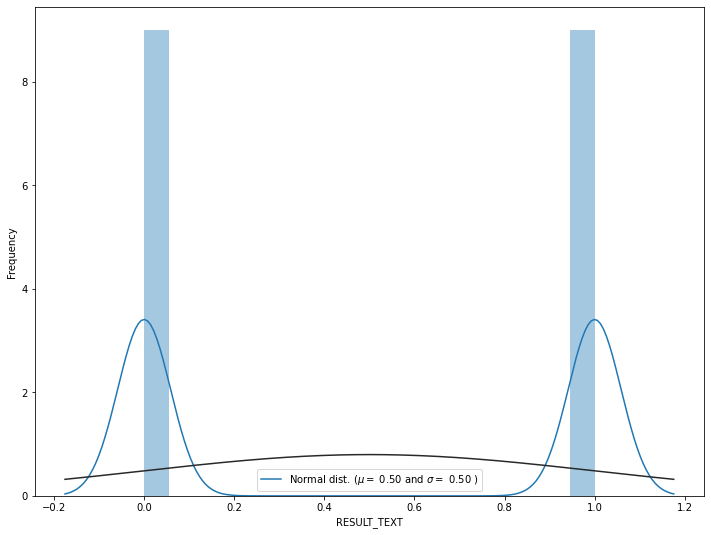

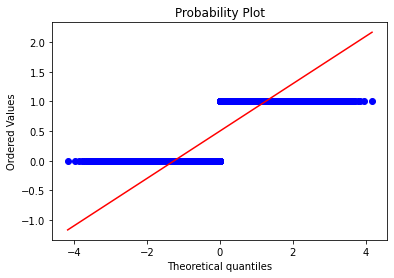

In [ ]:
#[13]
import seaborn as sns
from scipy import stats
plt.subplots(figsize=(12,9))
sns.distplot(MiceImputed['RESULT_TEXT'], fit=stats.norm)
# fit the mean and standard deviation
(mu, sigma) = stats.norm.fit(MiceImputed['RESULT_TEXT'])
# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
#Probablity plot
fig = plt.figure()
stats.probplot(MiceImputed['RESULT_TEXT'], plot=plt)
plt.show()

From the above distribution, it is observed that the target column is right-skewed and one more observation we can conclude from this is that the outliers are on the right side. To make the target variable in a normal distribution we used log function so that the mean and standard deviation becomes to make as a standard normal distribution after standardizing the values in the target column.[13]

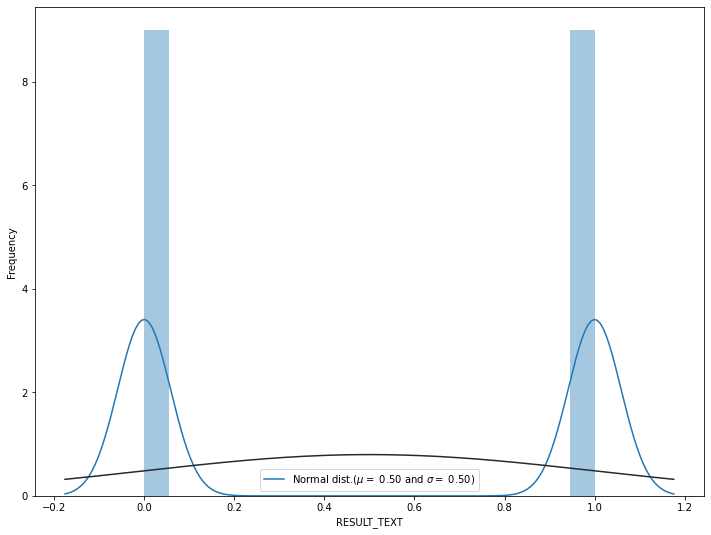

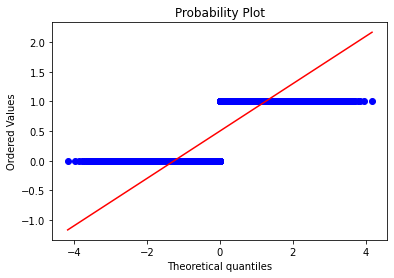

In [ ]:
#This target variabale is right skewed. Now, we need to transform this variable and make it normal distribution.
#using log function to normalize#
#[13]
MiceImputed['price'] = np.log1p(MiceImputed['RESULT_TEXT'])
#Check again for more normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(MiceImputed['RESULT_TEXT'], fit=stats.norm)
# fit the mean and standard deviation
(mu, sigma) = stats.norm.fit(MiceImputed['RESULT_TEXT'])
# plot with the distribution
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=$ {:.2f})'
                           .format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
#Probablity plot
fig = plt.figure()
stats.probplot(MiceImputed['RESULT_TEXT'], plot=plt)
plt.show()

# **Outlier detection**

As most of the machine learning and deep learning algorithms are sensitive, it may take a longer time for training also gives us a less accurate model and poor results.

**What are Outliers ?**

Outliers are the datapoints which are significantly different from the rest of the datapoints in the dataset. Outliers increase the variance in the dataset which inturn results in the decrease in the statistical power. So it is very important to identify these outliers and treat them accordingly.[18]

**Defination:**

Outlier is an observation point that is distant from other observations.Extreme values can be present in both dependent & independent variables, in the case of supervised learning methods.

These extreme values need not necessarily impact the model performance or accuracy, but when they do they are called “Influential” points. Many machine learning models, like linear & logistic regression, are easily impacted by the outliers in the training data.Models like AdaBoost increase the weights of misclassified points on every iteration and therefore might put high weights on these outliers as they tend to be often misclassified. This can become an issue if that outlier is an error of some type, or if we want our model to generalize well and not care for extreme values.To overcome this issue, we can either change the model or metric, or we can make some changes in the data and use the same models [5]

![](https://drive.google.com/uc?export=view&id=1tZVHeBnhIVH2LkvLXFBFRev7jJl7nelQ)

![](https://drive.google.com/uc?export=view&id=1gQ0YliVHDL9QJLcEhSTDlGKwINGB7lYn)

**Reasons for the occurrence of Outliers**

Outliers can occur because of various reasons. Some of the most common reasons include:[18]
- Error in data entry.
- Inappropriate scaling of datapoints.
- Errors caused during measurement.
- Existence of genuine extreme data points.

**Importance of Outlier Detection**[18]


Now that we know the reasons for the occurrence of the outliers, it is also important to know why is it important to identify these outliers. Simple reason is that some of the measures of central tendency and measures of variability are affected by outliers.
- Mean: Since mean is the average of all the values present in the dataset, it is affected by the presence of outliers. The mean shifts towards the outlier.
- Median: Median is the middle value of the dataset and is not affected the presence of outliers. So we should use median instead of mean when we are dealing with the datasets consisting of outliers.
- Mode: Mode is the value that occurs maximum number of times in the dataset and is not affected by the outliers.
- Variance & Standard Deviation: Since mean is used to calculate both variance and standard deviation, both get affected by the outliers.
- Range: Since range is the difference between the minimum and maximum datapoints, range gets most affected by the presence of outliers.

Therefore except the median and mode, most of the other important measures get affected by the presence of outliers. Apart from these reasons, outliers also cause problems while fitting models and increase the errors. So it is very important to identify these outliers.

**Extreme Values in Independent Variables [5]**

These are called points of “high leverage”. With a single predictor, an extreme value is simply one that is particularly high or low. With multiple predictors, extreme values may be particularly high or low for one or more predictors (univariate analysis — analysis of one variable at a time) or may be “unusual” combinations of predictor values (multivariate analysis)


**Extreme Values in Target Variables [5]**

Regression — these extreme values are termed as “outliers”. They may or may not be influential points


Classification: Here, we have two types of extreme values:


1. **Outliers:** For example, in an image classification problem in which we’re trying to identify dogs/cats, one of the images in the training set has a gorilla (or any other category not part of the goal of the problem) by mistake. Here, the gorilla image is clearly noise. Detecting outliers here does not make sense because we already know which categories we want to focus on and which to discard

2. **Novelties:** Many times we’re dealing with novelties, and the problem is often called supervised anomaly detection. In this case, the goal is not to remove outliers or reduce their impact, but we are interested in detecting anomalies in new observations. Therefore we won’t be discussing it in this post. It is especially used for fraud detection in credit-card transactions, fake calls, etc.

Our major focus will be outliers (extreme values in target variable for further investigation and treatment). We’ll see the impact of these extreme values on the model’s performance.

## **9.1 Methods to identify the Outlier [5]**

**Common Methods for Detecting Outliers [5]**

When detecting outliers, we are either doing univariate analysis or multivariate analysis. When your linear model has a single predictor, then you can use univariate analysis. However, it can give misleading results if you use it for multiple predictors. One common way of performing outlier detection is to assume that the regular data come from a known distribution (e.g. data are Gaussian distributed). This assumption is discussed in the Z-Score method section below.

**Visualization**[18]

Presence of outliers can also be detected by using various visualization methods. Some of the famous plots include:
- Scatter plot
- Box and Whisker plot
- Histogram
- Distribution Plot
- QQ plot

1. **Box-Plot**

The quickest and easiest way to identify outliers is by visualizing them using plots. If your dataset is not huge (approx. up to 10k observations & 100 features), I would highly recommend you build scatter plots & box-plots of variables. If there aren’t outliers, you’ll definitely gain some other insights like correlations, variability, or external factors like the impact of world war/recession on economic factors. However, this method is not recommended for high dimensional data where the power of visualization fails.


To know the outliers in column features with the help of box plot visualization. For this, I create a for loop in which I used columns that have the type of int64 and float64. We can also observe outliers from the describe() function. If there are differences between the 75% to the maximum value and the difference between the minimum and 25% then there are outliers.[13]

The box plot uses inter-quartile range to detect outliers.

 Here, we first determine the quartiles Q1 and Q3.

Interquartile range is given by, IQR = Q3 — Q1

Upper limit = Q3+1.5*IQR

Lower limit = Q1–1.5*IQR

![](
https://drive.google.com/uc?export=view&id=1Co72C3c03NmxMSXaLVOKb6HDlr10X6Mf)

In [ ]:
#[13]

#outliers with boxplot
for column in MiceImputed :
    if MiceImputed [column].dtype in ['int64', 'float64']:
        plt.figure()
        MiceImputed .boxplot(column = [column])

These are some box plots but in actual it will show all column features box plots. We also need to know if there are any outliers in the target column or not.[13]

In [ ]:
MiceImputed

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
0,0.893023,0.30,0.5,0.000000,1.000000,0.174176,0.481995,1.0,0.0,0.0
1,0.893454,0.41,0.5,0.000000,0.018519,0.947134,1.000000,1.0,0.0,0.0
2,0.893454,0.41,0.5,0.000000,0.018519,0.947090,0.481995,1.0,0.0,0.0
3,0.888200,0.23,0.5,0.000000,0.018519,0.476987,0.481995,1.0,0.0,0.0
4,0.888286,0.40,0.5,0.000000,0.018519,0.552535,0.481995,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13513,0.627562,0.84,0.5,0.000000,0.018519,0.372402,0.633636,1.0,0.0,1.0
8974,0.064083,0.09,0.5,0.000000,0.018519,0.468029,1.000000,1.0,0.0,1.0
18480,0.408010,0.20,0.5,0.000000,0.018519,0.545254,0.481995,1.0,0.0,1.0
20294,0.060034,0.72,0.0,0.567568,0.666667,0.456820,1.000000,1.0,0.0,1.0


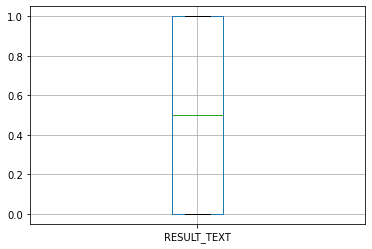

In [ ]:
MiceImputed.boxplot(column = ['RESULT_TEXT'])

After checking all these, we don’t need to take all the features as the independent variable and the price will be the target variable. So, we will choose some features that are most important for house prediction and making new data for our model.[13]

2. **Cook’s Distance**

This is a multivariate approach for finding influential points. These points may or may not be outliers as explained above, but they have the power to influence the regression model. We will see their impact in the later part of the blog.
This method is used only for linear regression and therefore has a limited application. Cook’s distance measures the effect of deleting a given observation. It’s represents the sum of all the changes in the regression model when observation “i” is removed from it.


3. **Z-Score**

This method assumes that the variable has a Gaussian distribution. It represents the number of standard deviations an observation is away from the mean:

Here, we normally define outliers as points whose modulus of z-score is greater than a threshold value. This threshold value is usually greater than 2 (3 is a common value).

All the above methods are good for initial analysis of data, but they don’t have much value in multivariate settings or with high dimensional data. For such datasets, we have to use advanced methods like PCA, LOF (Local Outlier Factor) & HiCS: High Contrast Subspaces for Density-Based Outlier Ranking.


Z-score tells us how many standard deviations above or below the mean a datapoint lies. It assumes that the datapoints follow a gaussian distribution[18]

-Z-Score = (X-mean) / Standard deviation

From the above normal distribtion figure we can we that:
- 68% of the data lies within 1 standard deviation.
- 95% of the data lies within 2 standard deviations.
- 99.7% of the data lies within 3 standard deviations.

Since majority of the datapoints (99.7%) lie within 3 standard deviations above or below the mean, any Z-score more than +3 or any Z-score less than -3 is considered as an outlier.[18]

![](
https://drive.google.com/uc?export=view&id=1E2H2NHulGaphunf9oVV_mVRCbgoS1I3e)

![](
https://drive.google.com/uc?export=view&id=1SQkD3XMh-VTNY2fe-mcDaVepK1IJNaP7)

![](
https://drive.google.com/uc?export=view&id=1GxzFoNg1XpORg9O8c46TvFvFsQ4WT3_e)

Outliers can be dangerous as they can skew your model and give you predictions that are biased and erroneous.
The best way to find outliers is to use the describe function and look at information such as maximum and mean.

In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

You can also plot a histogram and look at the distribution of your data.

In this histogram, you can see that most of the data is around 0 to 5000.

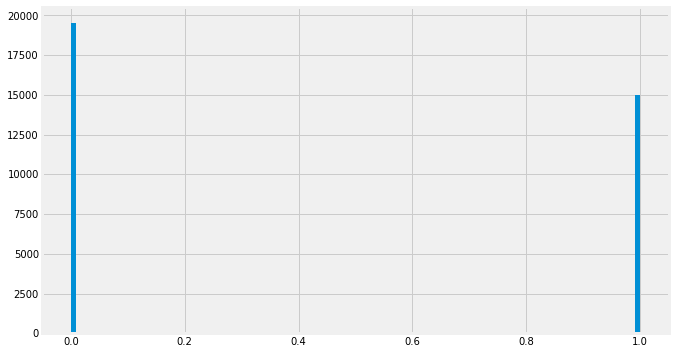

In [ ]:
plt.figure(figsize=(10, 6))
MiceImputed['RESULT_TEXT'].hist(bins=100)

A boxplot is also useful in detecting outliers.

As you can see, the price column has multiple data points that are outliers (above of the maximum in the boxplot)

In [ ]:
plt.figure(figsize=(10, 6))
MiceImputed.boxplot(column=['RESULT_TEXT'])

For categorical data, you can plot a bar chart to see whether a particular category to view the count of the categories.

Outliers in categorical data is tricky, because you have to determine whether it’s appropriate to call it an outlier based on context.

Some outliers are more obvious. Let’s say there’s an experiment done where 1000 people choose between a glass of water and a glass of milk. If the final result is 1 person who chose a glass of water, and 999 people choosing a glass of milk, that 1 person can be considered an outlier.

However, in some cases, outliers depend on context. In my example, you see that Manhattan and Brooklyn has significantly more data than Staten Island. This doesn’t count as an outlier, since Manhattan and Brooklyn has a higher housing density as compared to Staten Island.

In [ ]:
MiceImputed

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
1,10373.0,41.0,1.0,0.0,1.0,21463.0,1.000000e+15,1.0,1.000000e+15,0.0
2,10373.0,41.0,1.0,0.0,1.0,21462.0,1.000000e+15,1.0,1.000000e+15,0.0
3,10312.0,23.0,1.0,0.0,1.0,10809.0,1.000000e+15,1.0,1.000000e+15,0.0
4,10313.0,40.0,1.0,0.0,1.0,12521.0,1.000000e+15,1.0,1.000000e+15,0.0
5,10315.0,26.0,0.0,0.0,1.0,2063.0,1.000000e+15,1.0,1.000000e+15,0.0
...,...,...,...,...,...,...,...,...,...,...
12343,3001.0,65.0,0.0,0.0,1.0,3669.0,1.000000e+15,1.0,1.000000e+15,1.0
15056,2531.0,29.0,0.0,0.0,1.0,19534.0,1.000000e+15,1.0,1.000000e+15,1.0
13513,7286.0,84.0,1.0,0.0,1.0,8439.0,1.000000e+15,1.0,1.000000e+15,1.0
8974,744.0,9.0,1.0,0.0,1.0,10606.0,1.000000e+15,1.0,1.000000e+15,1.0


In [ ]:
plt.figure(figsize=(10, 6))
MiceImputed['DISTRICT'].value_counts().plot.bar()

**1. IQR Method**

Inter Quartile Range (IQR) is the middle 50% of the dataset. In other words, it is the difference between the third quartile(75th percentile) and first quartile(25th percentile) value of the dataset.

- IQR = Q3 -Q1
- Lower Bound = Q1–1.5*IQR
- Upper Bound = Q3+1.5*IQR
The IQR finds the lower and upper bound to identify the outliers. Any value which is 1.5 times above or below these thresholds is identified as an outlier [18]

![](https://drive.google.com/uc?export=view&id=1NfCaTr8uAB_e7EtnO0H5N8EAkSl9m-Ke)

**4. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN is a clustering method that is used to separate clusters of high denstiy from the clusters of low density. It basically divides the datapoints into Core Points, Border Points or Noise Points. Here Noise points are are the outliers.[18]

![](https://drive.google.com/uc?export=view&id=1qf6z8JdPyAK7-EqLqnNHiGkvyMlnRj0R)

**Hypothesis Testing** [18]

We can also use hypothesis testing to identify the outliers in the dataset. Some of the famous hypothesis tests for outlier detection include:
- Grubbs’ test
- Chi –square test
- Dixon’s Q test

Each of these above mentioned tests use different methods to identify outliers. In Grubb’s test, we assume that:
- Null hypothesis: All datapoints in the sample were drawn from a single population that follows the same normal distribution.
- Alternate hypothesis: One datapoint in the sample was not drawn from the same normally distributed population as the other datapoints.
- If the p-value is less than the significance level, we can reject the null hypothesis and conclude that one of the values is an outlier.

**Dealing with outliers**

So now that we know how and why to detect outliers, the next question that arises is that what to do with these outliers.
One simple way is to just drop the outlier, but this is not correct for all scenarios. based on the use case we need to decide whether to drop an outlier or not.[18]


Dealing with outliers is similar to removing missing values, the only difference is the way you find outliers.

To categorize numerical values as outliers, there are statistical techniques like using the standard deviation and the Interquartile range. You can refer to this article for code examples to do that.

For categorical values, if they have very low frequency (like Staten island in the example above), it still may become a problem for your model. Depending on context and nature of the data, you can choose to group them into one category, for example “Others”. This way your model will be less biased and you’re not losing any information.

**When to drop an outlier?**[18]

- When we know for sure that the outlier is completely wrong.
- When we have large amount of data.
- When we can revert back to the original data, if in later stage we find that the dropping of the outlier wasn’t a good idea.

**When not to drop an outlier?**[18]

- When there a lot of outliers.
- When dealing with a sensitive critical use case.

**What to do with the undroppable outliers?**[18]

- Impuation: We can replace the outlier values with the mean, median or mode value based on the use case.
- Quantile-based Flooring and Capping: In this technique,we can do the flooring (e.g., replacing with the 10th percentile) for the lower values and capping (e.g.,replacing with the 90th percentile) for the higher values.

# **Data spliting**

![](https://drive.google.com/uc?export=view&id=168Enbhun0wZ6d9cCr6ef_zUz-P5m3L9v)

In [ ]:
X=MiceImputed.drop('RESULT_TEXT',axis=1)

In [ ]:
y=MiceImputed[['RESULT_TEXT']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [ ]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4

# **References**



[1-Fill Missing Values in a Dataset using Python](https://thecleverprogrammer.com/2021/05/29/fill-missing-values-in-a-dataset-using-python/)

[2- Data Cleaning with Python](https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45)

[3- SMOTE using Python](https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688)

[4-Protecting your Money: Detecting Credit Card Fraud with ML/DL](https://towardsdatascience.com/protecting-your-money-detecting-credit-card-fraud-with-ml-dl-2c4a9b9a0779)

[5-How to Make Your Machine Learning Models Robust to Outliers](https://heartbeat.comet.ml/how-to-make-your-machine-learning-models-robust-to-outliers-44d404067d07)

[6-What Is Encoding? And Its Importance in Data Science!](https://medium.datadriveninvestor.com/what-is-encoding-and-its-importance-in-data-science-6a2b0cce8e8e)

[7-Nominal And Ordinal Encoding In Data Science!](https://medium.com/nerd-for-tech/nominal-and-ordinal-encoding-in-data-science-c93872601f16)

[8-imbalanced-learn documentation](https://imbalanced-learn.org/stable/user_guide.html)

[Feature Engineering for Categorical Data](https://medium.com/geekculture/feature-engineering-for-categorical-data-a77a04b3308)

[Handling Imbalanced Datasets With Oversampling Techniques. It’s Pros & Cons.](https://medium.com/analytics-vidhya/handling-imbalanced-datasets-with-oversampling-techniques-its-pros-cons-ba9f36ac5b71)

[8-Overcoming Imbalanced Dataset](https://xzz201920.medium.com/imbalanced-dataset-26732a333cf7)

[9-How to handle Categorical variables?](https://medium.com/geekculture/how-to-handle-categorical-variables-7c1ee198c55c)

[10-Five Cool Python Libraries for Data Science](https://pub.towardsai.net/five-cool-python-libraries-for-data-science-7f1fce402b90)

[11-Scikit-Learn (Python): 6 Useful Tricks for Data Scientists](https://levelup.gitconnected.com/scikit-learn-python-6-useful-tricks-for-data-scientists-1a0a502a6aa3)

[12-Feature Scaling with Python’s Scikit-learn](https://pub.towardsai.net/feature-scaling-with-pythons-scikit-learn-10ab42119ae0)

[13-Regression Algorithm to Predict House Prices in Python](https://pub.towardsai.net/regression-algorithm-to-predict-house-prices-in-python-7722f2d76548)

[14-One Hot Encode in Machine Learning](https://debuggercafe.com/one-hot-encode-in-machine-learning/)

[15-What is skewness in data? How to fix skewed data in python?](https://yashowardhanshinde.medium.com/what-is-skewness-in-data-how-to-fix-skewed-data-in-python-a792e98c0fa6)

[16- 9 Seaborn Datasets for Data Science + ML Beginners](https://python.plainenglish.io/9-datasets-for-data-science-ml-beginners-cfb57df53fda)

[17-How to Deal with an Imbalanced Dataset in Machine Learning](https://towardsdatascience.com/how-to-deal-with-an-imbalanced-dataset-in-machine-learning-4f89a1967868)

[18- Outlier Detection in Machine Learning](https://medium.com/@listontellis/outlier-detection-in-machine-learning-382557c775aa)


[19- Essential guide to Improve Imbalanced Data Classification Model Performance](https://medium.com/geekculture/essential-guide-to-improve-imbalanced-data-classification-model-performance-c8cf0125b731)

[20-Python Tricks for Data Science
](https://medium.com/analytics-vidhya/python-tricks-for-data-science-fd038ab838a)

[21-10 Fantastic Python Packages](https://levelup.gitconnected.com/10-fantastic-python-packages-af2a16a1183a)

[22-Skewness — Everything you need to know about Skewness](https://aayushmaan1306.medium.com/skewness-everything-you-need-to-know-about-skewness-d94e88508e92)

[23-Different Ways To Handle Imbalanced Dataset In Machine Learning](https://medium.com/geekculture/different-ways-to-handl-imbalanced-dataset-in-machine-learning-32c7bc350257)

[5 Obscure Python Libraries Every Data Scientist Should Know](https://medium.com/analytics-vidhya/5-obscure-python-libraries-every-data-scientist-should-know-3651bf5d3be3)



[Descriptive Statistics in data science -with illustrations in ‘python’](https://medium.com/analytics-vidhya/descriptive-statistics-in-data-science-with-illustrations-in-python-efd5ccc152f1)

[The Ultimate Python Package to Pre-Process Data for Machine Learning](https://medium.com/swlh/the-ultimate-python-package-to-pre-process-data-for-machin-learning-c87bcc39fa66)

[23 great Pandas codes for Data Scientists](https://towardsdatascience.com/23-great-pandas-codes-for-data-scientists-cca5ed9d8a38)

[24-Day 13–60 days of Data Science and Machine Learning](https://medium.datadriveninvestor.com/day-13-60-days-of-data-science-and-machine-learning-52df0d8d88f)

[What Is Data Preprocessing in Machine Learning, and Its Importance?](https://www.analytixlabs.co.in/blog/data-preprocessing-in-machine-learning/?fbclid=IwAR0Xg83-Uu9Ha9s1mwkJsr-QiyfjOkIiGqn7mAxFSiNs1w5B0ohD-_x5cnI#sub3.2)

[3 Pandas Functions That Will Make Your Life Easier](https://towardsdatascience.com/3-pandas-functions-that-will-make-your-life-easier-4d0ce57775a1)

[My top 4 functions to style the Pandas Dataframe](https://towardsdatascience.com/my-top-4-functions-to-style-the-pandas-dataframe-932cdc79be39)

[How to Clean and Trim String Values in a Pandas DataFrame with Python, Pandas, and the Strip() method](https://deallen7.medium.com/how-to-clean-and-trim-string-values-in-a-pandas-dataframe-with-python-pandas-and-the-strip-c75169f0ebf2)

[7 Uncommon But Useful Pandas Functions](https://towardsdatascience.com/7-uncommon-but-useful-pandas-functions-f9f772858859)

[5 Obscure Python Libraries Every Data Scientist Should Know](https://medium.com/analytics-vidhya/5-obscure-python-libraries-every-data-scientist-should-know-3651bf5d3be3)

[Life Cycle Of Data Science Projects!](https://medium.com/mlearning-ai/life-cycle-of-data-science-projects-a4739f6e2419)


[3 Pandas Functions That Will Make Your Life Easier](https://towardsdatascience.com/3-pandas-functions-that-will-make-your-life-easier-4d0ce57775a1)

[Different Ways To Handle Imbalanced Dataset In Machine Learning](https://medium.com/geekculture/different-ways-to-handl-imbalanced-dataset-in-machine-learning-32c7bc350257)

[Cleaning a messy dataset using Python](https://medium.com/well-red/cleaning-a-messy-dataset-using-python-7d7ab0bf199b)

[6.3. Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)

[scikit-learn](https://scikit-learn.org/stable/)

[How to Combine Multiple Datasets](https://pub.towardsai.net/how-to-combine-multiple-datasets-e78c7e1433b3)

[The Ultimate Python Package to Pre-Process Data for Machine Learning](https://medium.com/swlh/the-ultimate-python-package-to-pre-process-data-for-machin-learning-c87bcc39fa66)

[Data-Preprocessing with Python](https://medium.com/dataseries/data-preprocessing-with-python-3914d3e9dd30)

[How to Deal with Missing Values?](https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-600b70b79918)

[Google Colab for Data Science Projects](https://benjaminobi.medium.com/google-colab-for-data-science-projects-7c59e45e9d32)


[How to Deal with Categorical Features for Machine Learning](https://medium.com/analytics-vidhya/how-to-deal-with-categorical-features-for-machine-learning-17c6c160ea1)

[5 pandas functions I found to be useful for specific operations](https://soulsinporto.medium.com/5-pandas-functions-i-found-to-be-useful-for-specific-transformations-a5a2af3b69c7)

[7 Python Libraries to Make Automation Easy](https://python.plainenglish.io/7-python-libraries-to-make-automation-easy-aea8fb6562a7)

[Z-Distribution or Z-Score Application in Machine Learning](https://medium.com/pythoneers/z-distribution-or-z-score-application-in-machine-learning-fbba081cd9fe)

[How to Generate Synthetic Tabular Dataset](https://www.kdnuggets.com/2022/03/generate-tabular-synthetic-dataset.html)
